[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/ELMED219-2026/blob/main/Lab0-ML/notebooks/01-Enkle_eksempler.ipynb)

Versjon 27.11.2025, A. Lundervold / A. S. Lundervold

# Et første eksempel på maskinlæring

Velkommen til ditt første praktiske møte med maskinlæring! 

I denne Jupyter Notebook skal vi bruke maskinlæring til å studere noen klassiske benchmark-datasett. Målet er å gi deg en konkret forståelse av hva maskinlæring egentlig er, og hvordan det fungerer i praksis.

**Hva er maskinlæring?**

Tradisjonelt programmerer vi datamaskiner ved å gi dem eksplisitte instruksjoner: "gjør dette, så dette, så dette". I maskinlæring gjør vi noe fundamentalt annerledes – vi gir datamaskinen *data* og lar den *lære* mønstre fra disse dataene. Algoritmen finner selv ut hvordan den skal løse oppgaven basert på eksemplene vi gir den.

**Hvorfor er dette viktig i medisin?**

Tenk deg at du skal lage et program som kan gjenkjenne kreftceller i mikroskopbilder. Det ville være ekstremt vanskelig å skrive eksplisitte regler for hva som gjør en celle til en kreftcelle. Men med maskinlæring kan vi vise algoritmen tusenvis av eksempler på normale og unormale celler, og la den lære å skille mellom dem selv.

---

> 💡 **Tips:** Du finner celler merket "Din tur!" nedenfor. Disse er ment for at du skal eksperimentere med koden selv.

> 🔧 **Råd:** Modifiser gjerne koden, endre parametere, og utforsk på egenhånd! Praktisk utforskning gir dypere forståelse.

In [1]:
# ============================================================================
# MILJØSJEKK
# ============================================================================
# Denne cellen sjekker om vi kjører i Google Colab eller Kaggle.
# Dette er viktig fordi noen deler av koden må tilpasses ulike miljøer.
# Vi gjør denne sjekken i starten av alle notebooks i kurset.

try:
    import google.colab
    colab = True
    print("✓ Kjører i Google Colab")
except:
    colab = False
    print("✗ Kjører IKKE i Google Colab")

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if kaggle:
    print("✓ Kjører i Kaggle")
else:
    print("✗ Kjører IKKE i Kaggle")

✗ Kjører IKKE i Google Colab
✗ Kjører IKKE i Kaggle


## Vårt første datasett: Iris-blomster

For å komme i gang trenger vi data. Vi starter med et klassisk og mye studert datasett: **Iris-blomsterdatasettet** (https://archive.ics.uci.edu/ml/datasets/iris).

### Hvorfor akkurat Iris-datasettet?

1. **Enkelt og oversiktlig**: Bare 150 observasjoner med 4 egenskaper hver
2. **Godt forstått**: Brukt i maskinlæring siden 1936!
3. **Tydelig demonstrasjon**: Viser klassifiseringsteknikker på en forståelig måte
4. **Visuelt intuitivt**: Vi kan faktisk *se* forskjellene mellom klassene

Senere i kurset skal vi se på mer kompliserte (og interessante!) datasett, inkludert medisinske data.

<img src="https://raw.githubusercontent.com/HVL-ML/DAT158/main/notebooks/assets/iris.png" width="600">

**Figur 1: De tre Iris-artene i datasettet.** *Fra venstre: Iris setosa, Iris versicolor og Iris virginica. Legg merke til de synlige forskjellene i blomstenes form og størrelse – dette er egenskapene vi skal bruke for å lære datamaskinen å skille dem.*

### Oppgaven: Klassifisering

Målet er å **predikere** hvilken Iris-art en blomst tilhører, basert på målinger av:
- **Begerblad** (sepal): lengde og bredde
- **Kronblad** (petal): lengde og bredde

De tre artene er:
- *Iris setosa*
- *Iris versicolor*  
- *Iris virginica*

> 📚 **Vokabular:** Å tilordne hvert datapunkt til en *klasse* kalles **klassifisering** (classification). Dette er en av de vanligste oppgavene i maskinlæring.

> 🤔 **Refleksjon:** Hvorfor skulle vi ønske at en maskin klassifiserer blomster for oss? Kan du tenke deg praktiske anvendelser der klassifisering er viktig? Tenk for eksempel på medisinsk diagnostikk, spam-filtrering, eller ansiktsgjenkjenning.

---

# Sett opp maskinlæringsrammeverket

Før vi kan begynne med selve maskinlæringen, må vi importere de nødvendige verktøyene. I programmering er et **bibliotek** (library) en samling av ferdiglagde verktøy som hjelper oss med spesifikke oppgaver uten at vi må bygge alt fra bunnen av.

### De viktigste bibliotekene vi bruker:

| Bibliotek | Hva det brukes til |
|-----------|--------------------|
| **NumPy** | Numeriske beregninger, matriser og vektorer |
| **Pandas** | Håndtering av tabelldata (som Excel, bare kraftigere!) |
| **Matplotlib** | Visualiseringer og plotting |
| **scikit-learn** | Maskinlæringsalgoritmer |

Gjør deg kjent med disse – du kommer til å bruke dem mye!

In [2]:
# ============================================================================
# IMPORTER NØDVENDIGE BIBLIOTEKER
# ============================================================================

# NumPy: Fundamentalt bibliotek for numeriske beregninger i Python
# Vi bruker aliaset 'np' for kortere kode
import numpy as np

# Pandas: Kraftig verktøy for datamanipulering og analyse
# Perfekt for tabelldata (tenk: Excel på steroider)
import pandas as pd

# Matplotlib: Standardbibliotek for visualisering i Python
# pyplot-modulen gir oss et MATLAB-lignende grensesnitt
import matplotlib.pyplot as plt

print("✓ Alle grunnleggende biblioteker importert!")

✓ Alle grunnleggende biblioteker importert!


In [3]:
# ============================================================================
# KONFIGURER ARBEIDSMILJØET
# ============================================================================

# Sett random seed for reproduserbarhet
# Dette sikrer at alle som kjører denne notebooken får samme resultater
# Tallet 42 er vilkårlig (men populært i datavitenskap!)
np.random.seed(42)

# Konfigurer Matplotlib til å vise figurer direkte i notebooken
%matplotlib inline

print("✓ Miljøet er konfigurert og klart!")

✓ Miljøet er konfigurert og klart!


### scikit-learn: Vårt maskinlæringsbibliotek

`scikit-learn` er det mest brukte Python-biblioteket for maskinlæring. Det tilbyr:

- **Ferdiglagde algoritmer** for klassifisering, regresjon, clustering, m.m.
- **Enkelt grensesnitt**: Alle modeller følger samme mønster (fit → predict)
- **God dokumentasjon**: https://scikit-learn.org

In [4]:
# Importer scikit-learn hovedbiblioteket
import sklearn

# Vis hvilken versjon vi bruker (nyttig for reproduserbarhet)
print(f"scikit-learn versjon: {sklearn.__version__}")

scikit-learn versjon: 1.7.2


---

# Last inn, utforsk og forbered dataene

I denne seksjonen skal vi:

1. **Laste** datasettet
2. **Utforske** dets egenskaper (features) og merkelapper (labels)
3. **Forstå** strukturen
4. **Konvertere** til Pandas DataFrame for enklere manipulering

In [5]:
# Importer funksjonen for å laste Iris-datasettet
from sklearn.datasets import load_iris

# Last inn datasettet
iris_dataset = load_iris()

print("✓ Iris-datasettet er lastet inn!")
print(f"  Datasettet inneholder {iris_dataset['data'].shape[0]} observasjoner")

✓ Iris-datasettet er lastet inn!
  Datasettet inneholder 150 observasjoner


In [6]:
# Vis beskrivelse av datasettet
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [9]:
# Utforsk egenskapene (features)
features = iris_dataset['feature_names']
print("Egenskaper (features) i datasettet:")
print("="*50)
for i, feature in enumerate(features, 1):
    print(f"  {i}. {feature}")

Egenskaper (features) i datasettet:
  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)


In [10]:
# Utforsk merkelappene (labels/targets)
print("Klasser (target labels) i datasettet:")
print("="*50)
for i, name in enumerate(iris_dataset['target_names']):
    print(f"  Klasse {i}: {name}")

Klasser (target labels) i datasettet:
  Klasse 0: setosa
  Klasse 1: versicolor
  Klasse 2: virginica


In [11]:
# Lag en Pandas DataFrame for enklere håndtering
iris_df = pd.DataFrame(
    iris_dataset['data'],
    columns=features
)
iris_df['label'] = iris_dataset['target']

print("De 10 første observasjonene:")
iris_df.head(10)

De 10 første observasjonene:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


---

# Visualiser dataene

Visualisering av data handler ikke bare om å lage pene figurer – det hjelper oss å **forstå** sammenhengene i dataene.

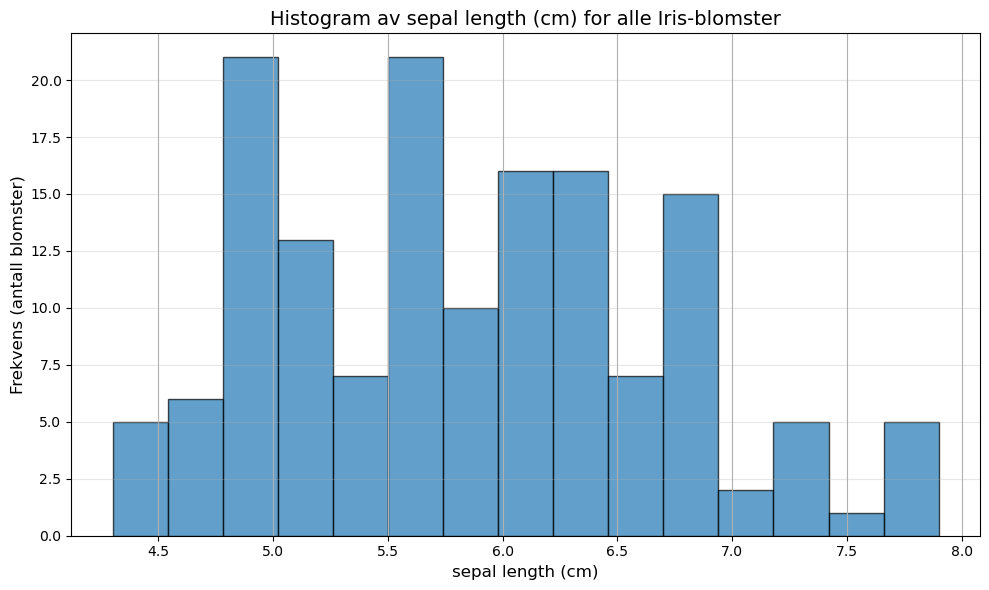


FIGUR 2: Histogram av begerblad-lengde
Tolkning: Histogrammet viser fordelingen av begerblad-lengde
for alle 150 Iris-blomster. De fleste har lengde mellom 5-7 cm.


In [13]:
# ============================================================================
# HISTOGRAM AV ÉN EGENSKAP
# ============================================================================

feat = 'sepal length (cm)'

fig, ax = plt.subplots(figsize=(10, 6))
iris_df[feat].hist(ax=ax, bins=15, edgecolor='black', alpha=0.7)
ax.set_xlabel(feat, fontsize=12)
ax.set_ylabel('Frekvens (antall blomster)', fontsize=12)
ax.set_title(f'Histogram av {feat} for alle Iris-blomster', fontsize=14)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFIGUR 2: Histogram av begerblad-lengde")
print("Tolkning: Histogrammet viser fordelingen av begerblad-lengde")
print("for alle 150 Iris-blomster. De fleste har lengde mellom 5-7 cm.")

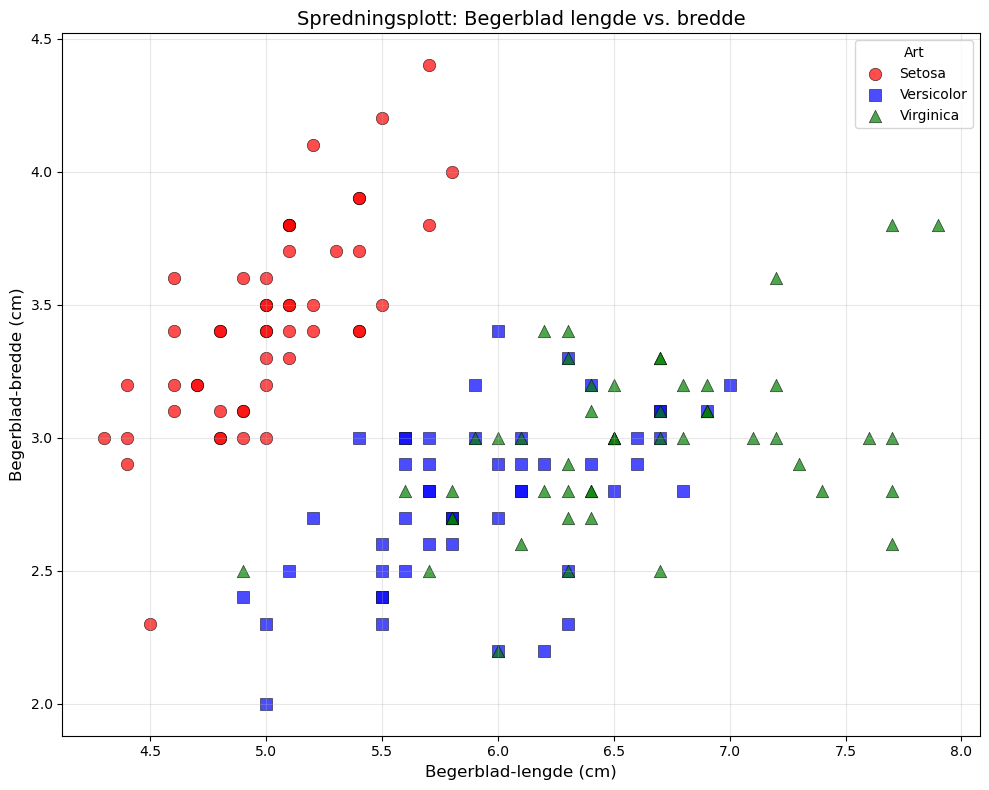


FIGUR 3: Spredningsplott av begerblad-dimensjoner
Tolkning: Iris setosa (rød) skiller seg tydelig ut med kortere,
bredere begerblad. Versicolor og virginica overlapper mer.


In [14]:
# ============================================================================
# SPREDNINGSPLOTT: BEGERBLAD LENGDE VS BREDDE
# ============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']
names = iris_dataset.target_names

for label in [0, 1, 2]:
    mask = iris_df['label'] == label
    ax.scatter(
        x=iris_df[mask]['sepal length (cm)'],
        y=iris_df[mask]['sepal width (cm)'],
        color=colors[label],
        label=names[label].capitalize(),
        s=80,
        marker=markers[label],
        alpha=0.7,
        edgecolors='black',
        linewidth=0.5
    )

ax.set_xlabel('Begerblad-lengde (cm)', fontsize=12)
ax.set_ylabel('Begerblad-bredde (cm)', fontsize=12)
ax.set_title('Spredningsplott: Begerblad lengde vs. bredde', fontsize=14)
ax.legend(title='Art', fontsize=10)
ax.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFIGUR 3: Spredningsplott av begerblad-dimensjoner")
print("Tolkning: Iris setosa (rød) skiller seg tydelig ut med kortere,")
print("bredere begerblad. Versicolor og virginica overlapper mer.")

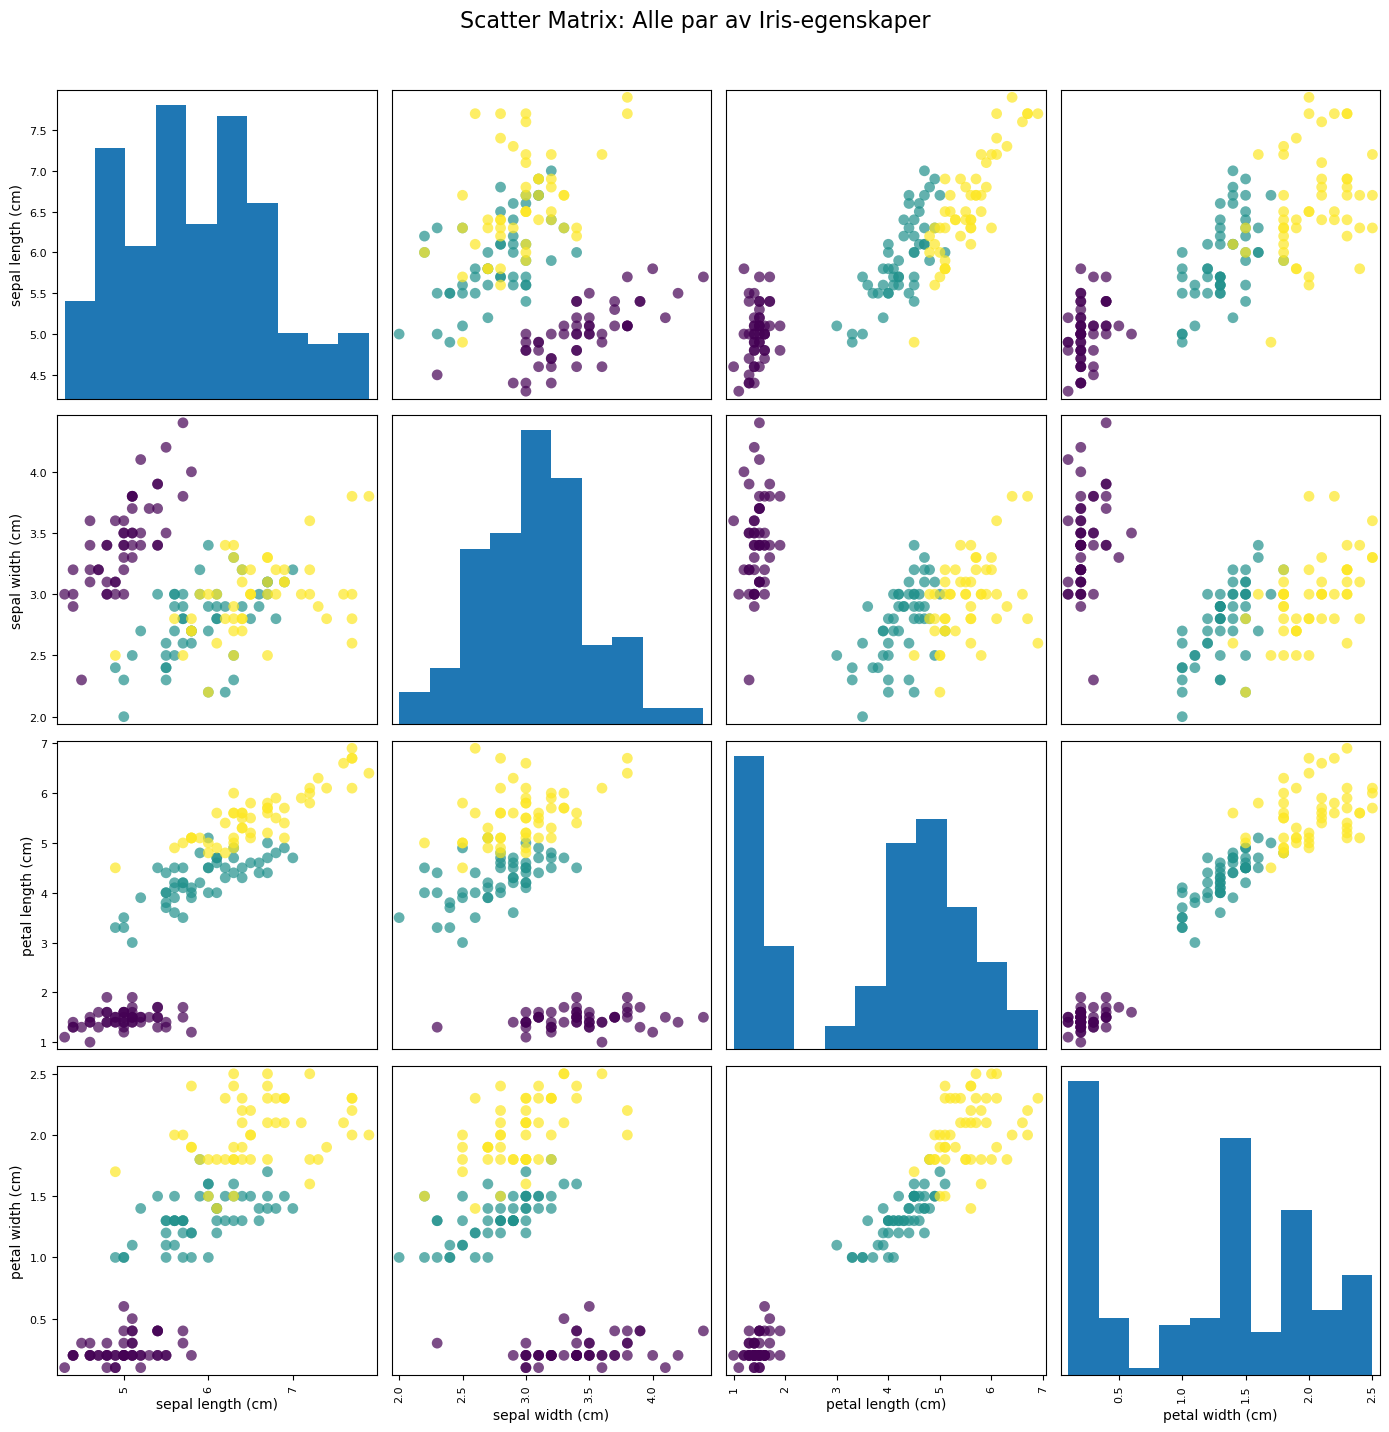


FIGUR 4: Scatter matrix
Tolkning: Kronblad-målinger (petal) viser best separasjon mellom arter.
Dette lover godt for maskinlæring!


In [21]:
# ============================================================================
# SCATTER MATRIX: ALLE KOMBINASJONER
# ============================================================================

pd.plotting.scatter_matrix(
    iris_df[features],
    c=iris_df['label'],
    figsize=(14, 14),
    marker='o',
    s=60,
    alpha=0.7,
    diagonal='hist'
)
plt.suptitle('Scatter Matrix: Alle par av Iris-egenskaper', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

print("\nFIGUR 4: Scatter matrix")
print("Tolkning: Kronblad-målinger (petal) viser best separasjon mellom arter.")
print("Dette lover godt for maskinlæring!")

---

# Tren en maskinlæringsmodell

Nå kommer vi til kjernen av maskinlæring: å faktisk **bygge en modell** som kan lære fra data og gjøre prediksjoner på nye, usette eksempler.

## Fra data til beslutninger

Tenk deg at du er en lege som skal diagnostisere pasienter. Gjennom årene har du sett tusenvis av pasienter og lært deg mønstre: "Pasienter med disse symptomene har ofte denne sykdommen." Du bruker denne erfaringen til å stille diagnoser på nye pasienter du aldri har møtt før.

En maskinlæringsmodell gjør akkurat det samme:
1. **Lære fra eksempler** (trening): Se på data der vi vet svaret
2. **Generalisere** (prediksjon): Bruke det den har lært på nye data

Men her kommer et kritisk spørsmål: **Hvordan vet vi at modellen faktisk har lært noe nyttig, og ikke bare memorert treningsdataene?**

---

## 🎯 Hvorfor dele dataene? Den viktigste innsikten i maskinlæring

Dette er kanskje den **viktigste konsepten** du vil lære i dette kurset:

> ⚠️ **Gullregelen:** Vi må ALLTID evaluere modellen på data den IKKE har sett under trening!

### Problemet: Overfitting (overtilpasning)

Tenk deg en student som pugger tidligere eksamensoppgaver ord for ord, uten å forstå konseptene. På en test med akkurat de samme oppgavene scorer studenten 100%. Men på en ny eksamen med litt annerledes spørsmål, feiler studenten totalt.

Dette kalles **overfitting** – modellen "pugger" treningsdataene i stedet for å lære de underliggende mønstrene.

**Eksempel fra medisin:**
- En modell trent til å oppdage lungekreft på røntgenbilder
- Hvis vi evaluerer på de samme bildene som ble brukt til trening, kan modellen ha "memorert" at "Bilde #47 = kreft"
- På nye pasienter fungerer modellen kanskje ikke i det hele tatt!

### Løsningen: Train/Test Split

Vi deler dataene i to (eller tre) separate deler:

```
┌─────────────────────────────────────────────────────────────┐
│                    ALLE DATA (100%)                         │
├────────────────────────────────────┬────────────────────────┤
│         TRENINGSDATA (75%)         │     TESTDATA (25%)     │
│                                    │                        │
│   Brukes til å BYGGE modellen      │  Brukes til å EVALUERE │
│   Modellen "ser" disse dataene     │  Modellen har ALDRI    │
│                                    │  sett disse dataene    │
└────────────────────────────────────┴────────────────────────┘
```

### De tre datasettene (for mer avansert bruk)

I praksis bruker vi ofte **tre** datasett:

| Datasett | Typisk størrelse | Formål |
|----------|-----------------|--------|
| **Treningsdata** | 60-80% | Lære mønstrene – bygge modellen |
| **Valideringsdata** | 10-20% | Justere modellens parametere (hyperparameter-tuning) |
| **Testdata** | 10-20% | Endelig, upartisk evaluering |

**Hvorfor validering?**
- Når vi prøver forskjellige modeller eller innstillinger, velger vi den som fungerer best på valideringsdataene
- Testdataene holdes helt tilbake til slutt – de er vår "eksamen"
- Hvis vi bruker testdata til å velge modell, har vi "jukset" og vet ikke hvor god modellen egentlig er

### Medisinsk perspektiv: Hvorfor dette er kritisk

I medisin kan konsekvensene av overfitting være alvorlige:

| Scenario | Konsekvens av overfitting |
|----------|--------------------------|
| Kreftdiagnose | Falske positive → unødvendige biopsier og angst |
| Sepsis-prediksjon | Falske negative → forsinket behandling, død |
| Legemiddeldosering | Feil dose → forgiftning eller manglende effekt |

> 💡 **Viktig innsikt:** En modell som ser fantastisk ut på treningsdata, men feiler på nye data, er *verdiløs* i klinisk praksis. Det er derfor train/test-split ikke er valgfritt – det er **fundamentalt**!

---

## La oss bygge vår første modell!

Nå skal vi:
1. Velge hvilke egenskaper (features) vi vil bruke
2. Dele dataene i trening og test
3. Trene en klassifikasjonsmodell
4. Evaluere hvor godt modellen fungerer på testdata

In [26]:
# ============================================================================
# VELG EGENSKAPER OG MERKELAPPER
# ============================================================================

# For demonstrasjon bruker vi bare begerblad-mål (2 av 4 egenskaper)
X = iris_dataset['data'][:, [0, 1]]
y = iris_dataset['target']

print(f"X (egenskaper): {X.shape} - {X.shape[0]} blomster med {X.shape[1]} målinger")
print(f"y (merkelapper): {y.shape} - {y.shape[0]} klasseetiketter")

X (egenskaper): (150, 2) - 150 blomster med 2 målinger
y (merkelapper): (150,) - 150 klasseetiketter


In [27]:
# ============================================================================
# DEL DATA I TRENING OG TEST
# ============================================================================

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

print(f"Treningsdata: {X_train.shape[0]} observasjoner (75%)")
print(f"Testdata:     {X_test.shape[0]} observasjoner (25%)")

Treningsdata: 112 observasjoner (75%)
Testdata:     38 observasjoner (25%)


## 🌲 Random Forest: Vår første maskinlæringsmodell

Nå skal vi velge hvilken algoritme vi skal bruke. Det finnes hundrevis av maskinlæringsalgoritmer, men vi starter med en av de mest populære og pålitelige: **Random Forest**.

### Hva er en Random Forest?

Navnet "Random Forest" (tilfeldig skog) gir faktisk et godt bilde av hvordan algoritmen fungerer:
- Den består av mange **beslutningstrær** (decision trees)
- Hvert tre er litt forskjellig fordi det er bygget med **tilfeldighet**
- Sammen danner trærne en "skog" som tar beslutninger ved **flertallsavstemning**

### Byggesteinen: Beslutningstrær

Et **beslutningstre** er som et flytskjema med ja/nei-spørsmål:

```
                    Er kronblad-lengde < 2.5 cm?
                           /          \
                         JA            NEI
                         |              |
                    SETOSA      Er kronblad-bredde < 1.7 cm?
                                      /          \
                                    JA            NEI
                                    |              |
                              VERSICOLOR      VIRGINICA
```

**Medisinsk analogi:** Tenk på det som en diagnostisk algoritme:
- "Har pasienten feber?" → Ja/Nei
- "Er CRP-verdien forhøyet?" → Ja/Nei
- "Er det hoste?" → Ja/Nei
- → Konklusjon: Sannsynlig diagnose

### Fra ett tre til en hel skog

Et enkelt beslutningstre kan være **ustabilt** – små endringer i dataene kan gi et helt annet tre. Løsningen er å bruke *mange* trær:

```
┌─────────────────────────────────────────────────────────────────┐
│                      RANDOM FOREST                              │
│                                                                 │
│   🌲 Tre 1    🌲 Tre 2    🌲 Tre 3    ...    🌲 Tre 100       │
│      |           |           |                  |               │
│   Setosa    Versicolor    Setosa           Setosa              │
│                                                                 │
│   ─────────────────────────────────────────────────────────    │
│                    FLERTALLSAVSTEMNING                         │
│                           ↓                                     │
│                  Endelig prediksjon: SETOSA                     │
└─────────────────────────────────────────────────────────────────┘
```

### Hva gjør Random Forest "tilfeldig"?

To typer tilfeldighet gjør at hvert tre blir unikt:

1. **Bootstrap sampling**: Hvert tre trenes på et tilfeldig utvalg av treningsdataene (med tilbakelegging)
2. **Tilfeldig feature-utvalg**: Ved hvert splitt i treet vurderes bare et tilfeldig utvalg av egenskapene

Denne tilfeldigheten gjør modellen mer **robust** og mindre utsatt for overfitting.

---

## 🎓 Hva skjer når vi "trener" modellen?

Når vi kaller `rf.fit(X_train, y_train)`, skjer følgende:

### Steg 1: Bygg mange beslutningstrær
For hvert av de 100 trærne (vi bruker `n_estimators=100`):

1. **Trekk et tilfeldig utvalg** av treningsdataene
2. **Bygg et tre** ved å finne de beste spørsmålene som skiller klassene
3. **Gjenta** til treet er ferdig bygget

### Steg 2: Finn de beste splittene
For hvert spørsmål i treet, algoritmen:
- Prøver forskjellige terskelverdier (f.eks. "Er lengde < 5.0?" vs "Er lengde < 5.5?")
- Velger spørsmålet som **best skiller klassene** fra hverandre
- Måler dette med et mål kalt **Gini impurity** eller **information gain**

### Hva "lærer" modellen egentlig?

Modellen lærer en samling av **beslutningsregler**:

| Tre | Lærte regler |
|-----|-------------|
| Tre 1 | "Hvis sepal_length < 5.45 OG sepal_width > 2.8 → Setosa" |
| Tre 2 | "Hvis sepal_length < 5.55 OG sepal_width > 2.75 → Setosa" |
| ... | ... |
| Tre 100 | "Hvis sepal_length < 5.35 OG sepal_width > 2.9 → Setosa" |

**Viktig innsikt:** Modellen lærer *ikke* en matematisk formel, men en *samling av regler* som beskriver hvordan egenskapene henger sammen med klassene.

---

## 💾 Hvordan er kunnskapen lagret i modellen?

Etter trening inneholder `rf`-objektet:

1. **100 beslutningstrær** – hver med sin egen struktur
2. **Splitt-regler** – hvilke egenskaper og terskelverdier som brukes
3. **Bladnode-prediksjoner** – hvilken klasse som predikeres i hver ende av treet

```python
# Etter trening kan vi inspisere modellen:
rf.n_estimators        # Antall trær (100)
rf.feature_importances_ # Hvor viktig hver egenskap er
rf.estimators_[0]      # Det første treet
```

### Når vi gjør prediksjoner (`rf.predict(X_test)`):

1. **Hvert tre** får se de nye dataene
2. **Hvert tre stemmer** på hvilken klasse det tror dataene tilhører
3. **Flertallet vinner** – den klassen flest trær stemte på blir prediksjonen

---

## Hvorfor er Random Forest så populær?

| Fordel | Forklaring |
|--------|------------|
| **Robust** | Mange trær kompenserer for hverandres feil |
| **Lite tuning** | Fungerer ofte godt "ut av boksen" |
| **Håndterer kompleksitet** | Kan lære ikke-lineære sammenhenger |
| **Tolkbar** | Kan fortelle oss hvilke egenskaper som er viktigst |
| **Rask** | Trærne kan bygges parallelt |

> 💡 **I medisin:** Random Forest brukes blant annet til:
> - Predikere pasientutfall basert på kliniske variabler
> - Klassifisere medisinske bilder
> - Identifisere risikofaktorer for sykdom

---

Nå er vi klare til å bygge vår Random Forest-modell!


In [30]:
# ============================================================================
# OPPRETT OG TREN MODELLEN
# ============================================================================

from sklearn.ensemble import RandomForestClassifier

# Opprett modell med 100 beslutningstrær
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Tren modellen på treningsdataene
rf.fit(X_train, y_train)

print("✓ Modellen er trent!")

✓ Modellen er trent!


## 📊 Evaluering av modellen: Hvordan vet vi om den er god nok?

Nå kommer et av de viktigste stegene i maskinlæring: **evaluering**. En modell er verdiløs hvis vi ikke vet hvor godt den fungerer – og i medisin kan feil prediksjoner ha alvorlige konsekvenser.

### Hvorfor er evaluering så viktig i medisin?

Tenk deg følgende scenario:

> *"Vi har utviklet en AI-modell som kan oppdage kreft med 95% nøyaktighet!"*

Dette høres imponerende ut, men **er det godt nok?** Svaret avhenger av:
- Hva betyr de 5% feilene?
- Hvem blir feildiagnostisert?
- Hva er konsekvensene av feilene?

---

## 🎯 Evalueringsmetrikker: Mer enn bare "nøyaktighet"

### 1. Accuracy (Nøyaktighet)

Den enkleste metrikken – andelen korrekte prediksjoner:

$$\text{Accuracy} = \frac{\text{Antall korrekte prediksjoner}}{\text{Totalt antall prediksjoner}}$$

**Problem:** Accuracy kan være misvisende!

**Eksempel:** En modell for å oppdage en sjelden sykdom (1% av befolkningen):
- Modellen sier alltid "frisk" → 99% accuracy!
- Men den fanger **ingen** syke pasienter

### 2. Confusion Matrix (Forvirringsmatrise)

For å forstå *hva slags* feil modellen gjør, bruker vi en forvirringsmatrise:

```
                        PREDIKERT
                    Positiv    Negativ
                  ┌──────────┬──────────┐
FAKTISK  Positiv  │    TP    │    FN    │
                  │ (Sant    │ (Falskt  │
                  │ positiv) │ negativ) │
                  ├──────────┼──────────┤
         Negativ  │    FP    │    TN    │
                  │ (Falskt  │ (Sant    │
                  │ positiv) │ negativ) │
                  └──────────┴──────────┘
```

| Term | Betydning | Medisinsk konsekvens |
|------|-----------|---------------------|
| **TP** (True Positive) | Syk, korrekt identifisert | ✓ Pasienten får behandling |
| **TN** (True Negative) | Frisk, korrekt identifisert | ✓ Pasienten slipper unødvendig behandling |
| **FP** (False Positive) | Frisk, men klassifisert som syk | ⚠️ Unødvendig angst, behandling, kostnader |
| **FN** (False Negative) | Syk, men klassifisert som frisk | ❌ **FARLIG!** Pasienten får ikke behandling |

### 3. Sensitivity og Specificity

Disse to metrikkene er **essensielle** i medisin:

**Sensitivity (Sensitivitet / Recall / True Positive Rate):**
$$\text{Sensitivity} = \frac{TP}{TP + FN} = \frac{\text{Korrekt identifiserte syke}}{\text{Alle som faktisk er syke}}$$

> *"Hvor mange av de syke fanger vi opp?"*

**Specificity (Spesifisitet / True Negative Rate):**
$$\text{Specificity} = \frac{TN}{TN + FP} = \frac{\text{Korrekt identifiserte friske}}{\text{Alle som faktisk er friske}}$$

> *"Hvor mange friske unngår vi å feildiagnostisere?"*

### 4. Precision (Presisjon)

$$\text{Precision} = \frac{TP}{TP + FP} = \frac{\text{Korrekt identifiserte syke}}{\text{Alle modellen sier er syke}}$$

> *"Når modellen sier 'syk', hvor ofte har den rett?"*

### 5. F1-Score

Kombinerer precision og recall i én metrikk:
$$\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$

---

## ⚖️ Hvilken metrikk bør du bruke?

**Det avhenger av konteksten!** Her er noen retningslinjer:

| Situasjon | Prioriter | Grunn |
|-----------|-----------|-------|
| **Screening for alvorlig sykdom** | Høy sensitivity | Bedre å ha noen falske alarmer enn å overse syke |
| **Bekreftende test før invasiv behandling** | Høy specificity | Unngå unødvendig kirurgi/cellegift |
| **Balansert problem** | F1-score | Kompromiss mellom precision og recall |
| **Ubalanserte klasser** | Unngå accuracy! | Bruk F1, AUC-ROC, eller balansert accuracy |

### Medisinsk eksempel: COVID-19 hurtigtest

- **Høy sensitivity viktigst**: Vi vil fange alle smittede
- Aksepterer noen falske positive (de kan ta PCR-test etterpå)
- En falsk negativ = smittet person sprer virus ukontrollert

### Medisinsk eksempel: Biopsi før kreftbehandling

- **Høy specificity viktigst**: Unngå unødvendige biopsier
- En biopsi har risiko (infeksjon, blødning, smerte)
- Bedre å observere litt lenger enn å operere friske pasienter

---

## 🏥 Fra evaluering til handling: "Actionable Information"

En evaluering er bare nyttig hvis den fører til **bedre beslutninger**. Spør deg selv:

### 1. Hva er den kliniske konteksten?
- Screening vs. diagnose vs. prognose?
- Hva er alternativene hvis modellen ikke brukes?
- Hva er konsekvensene av feil beslutninger?

### 2. Hva er terskelverdiene?
De fleste modeller gir en **sannsynlighet**, ikke bare ja/nei:

```
Pasient A: 73% sannsynlighet for diabetes
Pasient B: 51% sannsynlighet for diabetes
Pasient C: 12% sannsynlighet for diabetes
```

Hvor setter vi grensen? Ved 50%? Ved 30%? Ved 70%?

| Lav terskel (f.eks. 30%) | Høy terskel (f.eks. 70%) |
|--------------------------|--------------------------|
| Høy sensitivity | Lav sensitivity |
| Lav specificity | Høy specificity |
| Fanger flere syke | Færre falske alarmer |
| Flere unødvendige tester | Risikerer å overse syke |

### 3. Kommuniser usikkerhet!

En god medisinsk AI sier ikke bare "diabetes" eller "ikke diabetes", men:

> *"Basert på modellen har denne pasienten 73% sannsynlighet for diabetes. 
> Anbefalt handling: Utfør HbA1c-test for bekreftelse."*

### 4. Integrer med klinisk arbeidsflyt

```
┌─────────────────────────────────────────────────────────────┐
│                KLINISK BESLUTNINGSSTØTTE                    │
├─────────────────────────────────────────────────────────────┤
│                                                             │
│  Modellens prediksjon: Høy risiko for diabetes (73%)        │
│                                                             │
│  Anbefalt handling:                                         │
│  ☐ Bestill HbA1c-test                                       │
│  ☐ Planlegg oppfølgingstime                                 │
│  ☐ Gi livsstilsråd                                          │
│                                                             │
│  Modellens begrensninger:                                   │
│  • Trent på data fra 2015-2020                              │
│  • Sensitivity: 82%, Specificity: 76%                       │
│  • Ikke validert for pasienter under 18 år                  │
│                                                             │
└─────────────────────────────────────────────────────────────┘
```

---

## 📈 Oppsummering: Evalueringssjekkliste

Før du stoler på en maskinlæringsmodell i medisin, sjekk:

| ✓ | Spørsmål |
|---|----------|
| ☐ | Er modellen evaluert på **uavhengige testdata**? |
| ☐ | Er evalueringsmetrikkene **relevante for konteksten**? |
| ☐ | Er **sensitivity og specificity** rapportert? |
| ☐ | Vet vi hvordan modellen presterer på **subgrupper**? (kjønn, alder, etnisitet) |
| ☐ | Er det klart **hvilke handlinger** som bør følge av prediksjonene? |
| ☐ | Er **usikkerheten** kommunisert? |

> 💡 **Husk:** En modell med 78% nøyaktighet kan være utmerket i én kontekst og ubrukelig i en annen. Kontekst er alt!

---

La oss nå evaluere vår Iris-modell:


In [39]:
# ============================================================================
# EVALUER MODELLEN
# ============================================================================

from sklearn.metrics import accuracy_score

# Gjør prediksjoner på testdata
y_pred = rf.predict(X_test)

# Beregn nøyaktighet
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModellens nøyaktighet: {accuracy:.1%}")
print(f"→ {int(accuracy * len(y_test))} av {len(y_test)} blomster klassifisert korrekt")


Modellens nøyaktighet: 78.9%
→ 30 av 38 blomster klassifisert korrekt


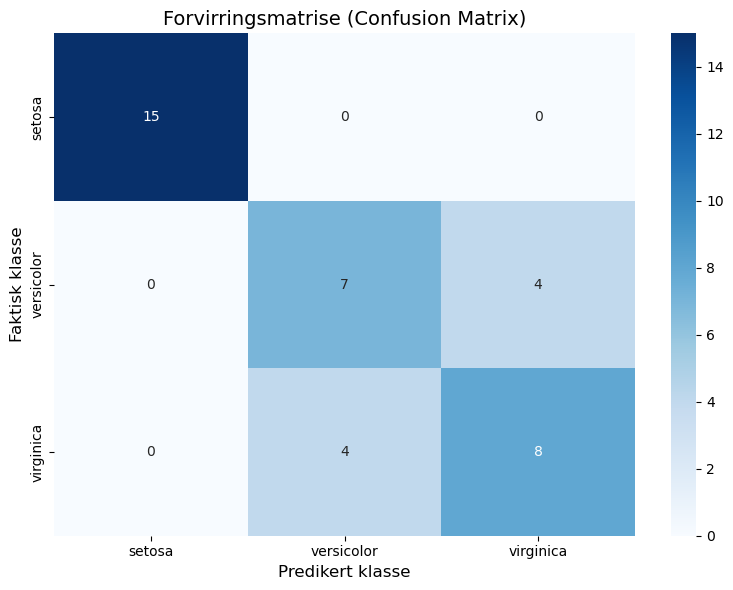


FIGUR: Forvirringsmatrise

Tolkning:
- Diagonalen (øverst venstre til nederst høyre) viser KORREKTE prediksjoner
- Alle andre celler viser FEIL prediksjoner
- Høye tall på diagonalen = god modell
- Eksempel: Hvis celle (setosa, versicolor) = 2, betyr det at 2 setosa-blomster
  ble feilaktig klassifisert som versicolor


CLASSIFICATION REPORT
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.64      0.64      0.64        11
   virginica       0.67      0.67      0.67        12

    accuracy                           0.79        38
   macro avg       0.77      0.77      0.77        38
weighted avg       0.79      0.79      0.79        38


Forklaring av metrikkene:
─────────────────────────────────────────────────────────────
• Precision: Av alle modellen sa var klasse X, hvor mange var riktig?
  → Høy precision = få falske positive

• Recall (Sensitivity): Av alle som faktisk var klasse X, hvor mange fant v

In [40]:
# ============================================================================
# UTFYLLENDE EVALUERING AV MODELLEN
# ============================================================================
# La oss bruke flere evalueringsmetrikker for å få et mer komplett bilde

from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score
)
import seaborn as sns

# -----------------------------------------------------------------------------
# 1. CONFUSION MATRIX (Forvirringsmatrise)
# -----------------------------------------------------------------------------
# Viser hvor mange av hver klasse som ble korrekt/feil klassifisert

cm = confusion_matrix(y_test, y_pred)

# Visualiser forvirringsmatrisen
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(
    cm, 
    annot=True,           # Vis tallene i cellene
    fmt='d',              # Heltallsformat
    cmap='Blues',         # Fargeskala
    xticklabels=iris_dataset.target_names,  # Klassenavn på x-aksen
    yticklabels=iris_dataset.target_names,  # Klassenavn på y-aksen
    ax=ax
)
ax.set_xlabel('Predikert klasse', fontsize=12)
ax.set_ylabel('Faktisk klasse', fontsize=12)
ax.set_title('Forvirringsmatrise (Confusion Matrix)', fontsize=14)
plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FIGUR: Forvirringsmatrise")
print("="*60)
print("""
Tolkning:
- Diagonalen (øverst venstre til nederst høyre) viser KORREKTE prediksjoner
- Alle andre celler viser FEIL prediksjoner
- Høye tall på diagonalen = god modell
- Eksempel: Hvis celle (setosa, versicolor) = 2, betyr det at 2 setosa-blomster
  ble feilaktig klassifisert som versicolor
""")

# -----------------------------------------------------------------------------
# 2. CLASSIFICATION REPORT
# -----------------------------------------------------------------------------
# Gir precision, recall og F1-score for hver klasse

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
print(classification_report(
    y_test, 
    y_pred, 
    target_names=iris_dataset.target_names
))

print("""
Forklaring av metrikkene:
─────────────────────────────────────────────────────────────
• Precision: Av alle modellen sa var klasse X, hvor mange var riktig?
  → Høy precision = få falske positive

• Recall (Sensitivity): Av alle som faktisk var klasse X, hvor mange fant vi?
  → Høy recall = få falske negative
  
• F1-score: Harmonisk gjennomsnitt av precision og recall
  → Balansert mål når begge er viktige

• Support: Antall faktiske eksempler av hver klasse i testsettet
─────────────────────────────────────────────────────────────
""")

# -----------------------------------------------------------------------------
# 3. DETALJERTE METRIKKER
# -----------------------------------------------------------------------------

print("="*60)
print("DETALJERTE METRIKKER")
print("="*60)

# For multiclass bruker vi 'weighted' for å ta hensyn til klassestørrelser
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"""
Vektede gjennomsnitt (tar hensyn til klassestørrelser):
──────────────────────────────────────────────────────
  Accuracy:   {accuracy:.1%}  (andel korrekte totalt)
  Precision:  {precision:.1%}  (hvor presis er modellen?)
  Recall:     {recall:.1%}  (hvor mange fanger vi opp?)
  F1-score:   {f1:.1%}  (balansert mål)
""")

# -----------------------------------------------------------------------------
# 4. ANALYSE AV FEILKLASSIFISERINGER
# -----------------------------------------------------------------------------

print("="*60)
print("ANALYSE AV FEILKLASSIFISERINGER")
print("="*60)

# Finn hvilke eksempler som ble feilklassifisert
feil_indekser = y_test != y_pred
antall_feil = sum(feil_indekser)

print(f"\nAntall feilklassifiseringer: {antall_feil} av {len(y_test)}")

if antall_feil > 0:
    print("\nDetaljer om feilene:")
    print("-" * 40)
    for i, (faktisk, predikert) in enumerate(zip(y_test[feil_indekser], y_pred[feil_indekser])):
        faktisk_navn = iris_dataset.target_names[faktisk]
        predikert_navn = iris_dataset.target_names[predikert]
        print(f"  Feil {i+1}: Faktisk = {faktisk_navn}, Predikert = {predikert_navn}")

print("""
\n💡 Innsikt:
──────────────────────────────────────────────────────
Legg merke til hvilke klasser som forveksles. I Iris-datasettet er det
typisk versicolor og virginica som er vanskeligst å skille, fordi de
overlapper mer i feature-rommet (se scatter matrix fra tidligere).

I en medisinsk kontekst ville vi analysert:
- Er feilene systematiske? (Overser vi alltid samme type pasienter?)
- Hvilke konsekvenser har de ulike feiltypene?
- Kan vi samle mer data for de problematiske tilfellene?
""")


---

# 🔍 Forklarbar AI (XAI) og Pålitelig AI (Trustworthy AI)

Nå har vi trent en modell og evaluert ytelsen. Men i medisin er det ikke nok at modellen fungerer – vi må også **forstå hvorfor** den tar de beslutningene den gjør, og vi må kunne **stole på** den.

## Hva er Explainable AI (XAI)?

**Explainable AI (XAI)** handler om å gjøre maskinlæringsmodeller *forståelige* for mennesker. I stedet for en "svart boks" som bare gir et svar, ønsker vi innsikt i:

- **Hvilke egenskaper** påvirker prediksjonene mest?
- **Hvorfor** ble akkurat denne pasienten klassifisert slik?
- **Når** kan vi stole på modellens prediksjoner?

### Hvorfor er XAI viktig i medisin?

| Situasjon | Uten XAI | Med XAI |
|-----------|----------|---------|
| Lege får AI-anbefaling | "Pasienten har 73% risiko for diabetes" | "73% risiko basert på: høyt glukosenivå (bidrar 45%), høy BMI (bidrar 30%), familiehistorie (bidrar 15%)" |
| Pasient spør "hvorfor?" | "Det sier modellen" | "Fordi dine blodverdier og vekthistorikk matcher mønstre vi ser hos diabetikere" |
| Feildiagnose oppdages | Umulig å forstå hva som gikk galt | Kan identifisere hvilke faktorer som misledet modellen |

> 📜 **Regulatorisk krav:** EU's AI Act krever at høyrisiko AI-systemer (inkludert medisinsk AI) må være forklarbare og transparente.

---

## 🔐 Trustworthy AI: Mer enn bare forklarbarhet

**Trustworthy AI** (pålitelig AI) er et bredere konsept som omfatter flere dimensjoner:

```
┌─────────────────────────────────────────────────────────────────┐
│                    TRUSTWORTHY AI                               │
│                                                                 │
│  ┌─────────────┐  ┌─────────────┐  ┌─────────────┐              │
│  │  ACCURACY   │  │ EXPLAINA-   │  │  FAIRNESS   │              │
│  │  Nøyaktighet│  │ BILITY      │  │  Rettferdig-│              │
│  │             │  │ Forklarbar- │  │  het        │              │
│  │  "Fungerer  │  │ het         │  │             │              │
│  │   det?"     │  │             │  │  "Fungerer  │              │
│  │             │  │  "Hvorfor?" │  │   det likt  │              │
│  │             │  │             │  │   for alle?"│              │
│  └─────────────┘  └─────────────┘  └─────────────┘              │
│                                                                 │
│  ┌─────────────┐  ┌─────────────┐  ┌─────────────┐              │
│  │ ROBUSTNESS  │  │  PRIVACY    │  │ ACCOUNTA-   │              │
│  │ Robusthet   │  │  Personvern │  │ BILITY      │              │
│  │             │  │             │  │ Ansvarlighet│              │
│  │  "Tåler den │  │ "Er data    │  │             │              │
│  │   støy?"    │  │  beskyttet?"│  │  "Hvem har  │              │
│  │             │  │             │  │   ansvar?"  │              │
│  └─────────────┘  └─────────────┘  └─────────────┘              │
└─────────────────────────────────────────────────────────────────┘
```

### De seks pilarene i Trustworthy AI

| Pilar | Beskrivelse | Medisinsk relevans |
|-------|-------------|-------------------|
| **1. Nøyaktighet** | Modellen gir korrekte prediksjoner | Feil diagnose = feil behandling |
| **2. Forklarbarhet** | Vi forstår hvorfor modellen predikerer | Legen må kunne forklare til pasienten |
| **3. Rettferdighet** | Modellen fungerer likt for alle grupper | Må ikke diskriminere basert på kjønn, etnisitet, alder |
| **4. Robusthet** | Modellen tåler variasjon og støy i data | Må fungere på data fra ulike sykehus/utstyr |
| **5. Personvern** | Pasientdata er beskyttet | GDPR, helseregisterloven |
| **6. Ansvarlighet** | Klart hvem som har ansvar ved feil | Hvem er ansvarlig hvis AI gir feil råd? |

---

## 🔬 XAI-teknikker i praksis

Det finnes flere metoder for å forklare maskinlæringsmodeller:

### 1. Feature Importance (Global forklaring)
**Spørsmål:** "Generelt sett, hvilke egenskaper er viktigst for modellen?"

→ Vi har allerede sett dette! Random Forest gir oss `feature_importances_`.

### 2. Permutation Importance (Global forklaring)
**Spørsmål:** "Hvor mye forverres modellen hvis vi tilfeldig roter en egenskap?"

→ Mer pålitelig mål enn innebygd feature importance.

### 3. SHAP Values (Lokal + Global forklaring)
**Spørsmål:** "For denne *spesifikke* prediksjonen, hvordan bidro hver egenskap?"

→ Gir både individuelle forklaringer og oversikt.

### 4. LIME (Local Interpretable Model-agnostic Explanations)
**Spørsmål:** "Kan vi lage en enkel modell som forklarer denne ene prediksjonen?"

→ Trener en tolkbar modell lokalt rundt prediksjonen.

### 5. Partial Dependence Plots (Global forklaring)
**Spørsmål:** "Hvordan endres prediksjonen når vi varierer én egenskap?"

→ Viser sammenhengen mellom egenskap og prediksjon.

---

## La oss demonstrere XAI på Iris-modellen!


               EXPLAINABLE AI (XAI) FOR IRIS-MODELLEN

──────────────────────────────────────────────────────────────────────
1. FEATURE IMPORTANCE - Hvilke egenskaper er viktigst?
──────────────────────────────────────────────────────────────────────


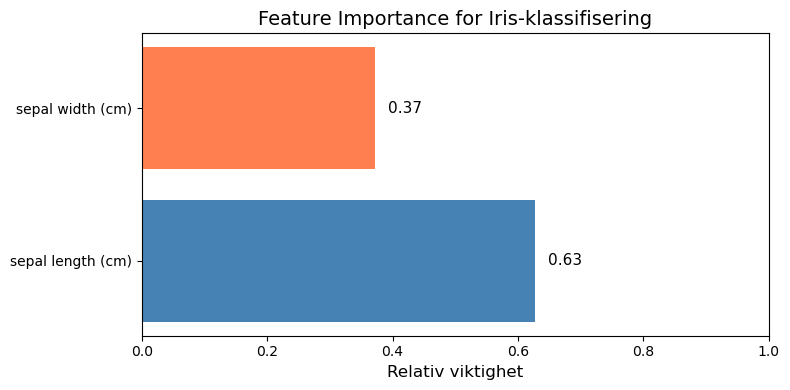


Tolkning:
  • Sepal length bidrar med 62.7% til modellens beslutninger
  • Sepal width bidrar med 37.3% til modellens beslutninger
  
  → Dette forteller oss at sepal length 
    er den viktigste egenskapen for å skille Iris-artene.


──────────────────────────────────────────────────────────────────────
2. PERMUTATION IMPORTANCE - Hva skjer hvis vi roter egenskapene?
──────────────────────────────────────────────────────────────────────


/var/folders/1g/_4x26lps6mgg1tr73d7g2bmh0000gp/T/ipykernel_22450/2923972209.py:65: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


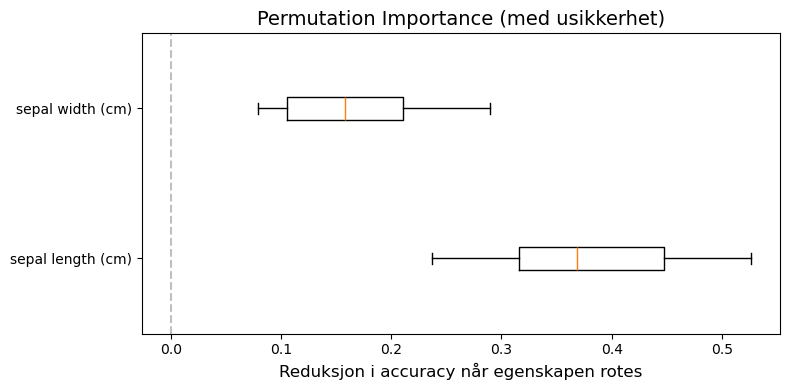


Tolkning:
  • Sepal length: 0.376 (±0.080)
  • Sepal width:  0.165 (±0.060)
  
  → En verdi på f.eks. 0.15 betyr at accuracy synker med ~15 prosentpoeng
    når vi tilfeldig blander denne egenskapen.
  → Negative verdier kan bety at egenskapen faktisk forvirrer modellen!


──────────────────────────────────────────────────────────────────────
3. FORKLARING AV ENKELTPREDIKSJONER
──────────────────────────────────────────────────────────────────────

La oss se på 3 enkeltprediksjoner:

  Blomst #1:
    Sepal length: 6.1 cm
    Sepal width:  2.8 cm
    Faktisk art:  versicolor
    Predikert:    versicolor ✓
    Konfidenser:  Setosa=0%, Versicolor=76%, Virginica=24%

  Blomst #11:
    Sepal length: 6.5 cm
    Sepal width:  3.2 cm
    Faktisk art:  virginica
    Predikert:    virginica ✓
    Konfidenser:  Setosa=0%, Versicolor=14%, Virginica=86%

  Blomst #21:
    Sepal length: 4.7 cm
    Sepal width:  3.2 cm
    Faktisk art:  setosa
    Predikert:    setosa ✓
    Konfidenser:  Setosa=99%,

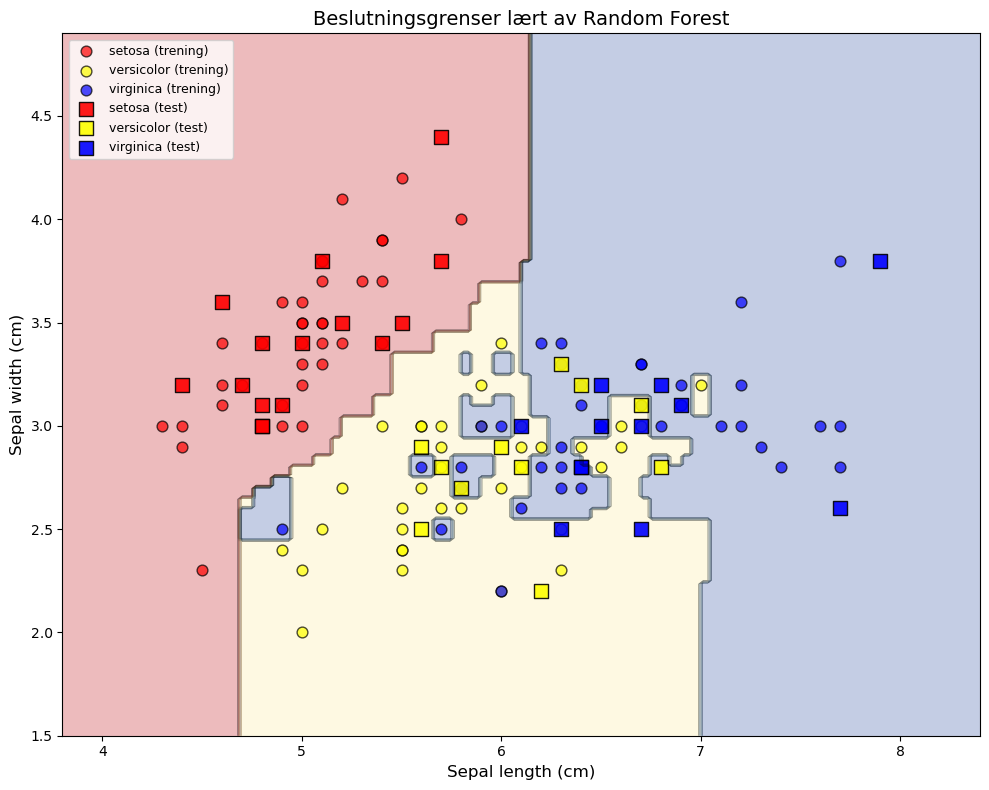


FIGUR: Beslutningsgrenser
───────────────────────────────────────────────────────────────
Tolkning:
  • Fargede områder viser hva modellen predikerer for ulike verdier
  • Grensene mellom fargene er "beslutningsgrensene"
  • Punkter som ligger nær en grense er vanskeligere å klassifisere
  
  → Legg merke til at setosa (rød) er lett separert
  → Versicolor og virginica har mer kompliserte, overlappende grenser
  
  Dette er FORKLARBAR AI: Vi kan faktisk SE hva modellen har lært!


         TRUSTWORTHY AI SJEKKLISTE FOR VÅR IRIS-MODELL

┌─────────────────────────────────────────────────────────────────────┐
│  ✓ NØYAKTIGHET                                                      │
│    Accuracy: 78.9% på testdata                                      │
│    → Akseptabelt for demonstrasjon, men ville trenge forbedring     │
│      for kritiske medisinske beslutninger                           │
├─────────────────────────────────────────────────────────────────────┤
│  ✓ FORKLARBARHET       

In [41]:
# ============================================================================
# EXPLAINABLE AI (XAI) DEMONSTRASJON PÅ IRIS-MODELLEN
# ============================================================================

print("="*70)
print("               EXPLAINABLE AI (XAI) FOR IRIS-MODELLEN")
print("="*70)

# -----------------------------------------------------------------------------
# 1. FEATURE IMPORTANCE (Innebygd i Random Forest)
# -----------------------------------------------------------------------------
print("\n" + "─"*70)
print("1. FEATURE IMPORTANCE - Hvilke egenskaper er viktigst?")
print("─"*70)

# Hent feature importance fra modellen
# Merk: Vi bruker bare 2 egenskaper (sepal length og width) i denne modellen
feature_names_used = ['sepal length (cm)', 'sepal width (cm)']
importances = rf.feature_importances_

# Visualiser
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.barh(feature_names_used, importances, color=['steelblue', 'coral'])
ax.set_xlabel('Relativ viktighet', fontsize=12)
ax.set_title('Feature Importance for Iris-klassifisering', fontsize=14)
ax.set_xlim(0, 1)

# Legg til verdier på søylene
for bar, imp in zip(bars, importances):
    ax.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, 
            f'{imp:.2f}', va='center', fontsize=11)

plt.tight_layout()
plt.show()

print(f"""
Tolkning:
  • Sepal length bidrar med {importances[0]:.1%} til modellens beslutninger
  • Sepal width bidrar med {importances[1]:.1%} til modellens beslutninger
  
  → Dette forteller oss at {'sepal length' if importances[0] > importances[1] else 'sepal width'} 
    er den viktigste egenskapen for å skille Iris-artene.
""")

# -----------------------------------------------------------------------------
# 2. PERMUTATION IMPORTANCE - Mer robust mål
# -----------------------------------------------------------------------------
print("\n" + "─"*70)
print("2. PERMUTATION IMPORTANCE - Hva skjer hvis vi roter egenskapene?")
print("─"*70)

from sklearn.inspection import permutation_importance

# Beregn permutation importance på testdataene
perm_importance = permutation_importance(
    rf, X_test, y_test, 
    n_repeats=30,           # Gjenta 30 ganger for stabilt estimat
    random_state=42
)

# Visualiser
fig, ax = plt.subplots(figsize=(8, 4))

# Lag boxplot for å vise usikkerhet
ax.boxplot(
    perm_importance.importances.T,
    vert=False,
    labels=feature_names_used
)
ax.set_xlabel('Reduksjon i accuracy når egenskapen rotes', fontsize=12)
ax.set_title('Permutation Importance (med usikkerhet)', fontsize=14)
ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

print(f"""
Tolkning:
  • Sepal length: {perm_importance.importances_mean[0]:.3f} (±{perm_importance.importances_std[0]:.3f})
  • Sepal width:  {perm_importance.importances_mean[1]:.3f} (±{perm_importance.importances_std[1]:.3f})
  
  → En verdi på f.eks. 0.15 betyr at accuracy synker med ~15 prosentpoeng
    når vi tilfeldig blander denne egenskapen.
  → Negative verdier kan bety at egenskapen faktisk forvirrer modellen!
""")

# -----------------------------------------------------------------------------
# 3. INDIVIDUELLE PREDIKSJONER - Hvorfor ble DENNE blomsten klassifisert slik?
# -----------------------------------------------------------------------------
print("\n" + "─"*70)
print("3. FORKLARING AV ENKELTPREDIKSJONER")
print("─"*70)

# Velg noen eksempler fra testsettet
print("\nLa oss se på 3 enkeltprediksjoner:\n")

for i in [0, 10, 20]:  # Velg noen indekser
    if i < len(X_test):
        blomst = X_test[i]
        faktisk = iris_dataset.target_names[y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]]
        predikert = iris_dataset.target_names[y_pred[i]]
        
        # Hent sannsynligheter for hver klasse
        probs = rf.predict_proba([blomst])[0]
        
        print(f"  Blomst #{i+1}:")
        print(f"    Sepal length: {blomst[0]:.1f} cm")
        print(f"    Sepal width:  {blomst[1]:.1f} cm")
        print(f"    Faktisk art:  {faktisk}")
        print(f"    Predikert:    {predikert} {'✓' if faktisk == predikert else '✗'}")
        print(f"    Konfidenser:  Setosa={probs[0]:.0%}, Versicolor={probs[1]:.0%}, Virginica={probs[2]:.0%}")
        print()

print("""
💡 Innsikt om konfidenser:
───────────────────────────────────────────────────────────────
  • Høy konfidens (f.eks. 95%) = Modellen er sikker
  • Lav konfidens (f.eks. 40%) = Modellen er usikker
  
  I medisin bør usikre prediksjoner flagges for menneskelig vurdering!
""")

# -----------------------------------------------------------------------------
# 4. BESLUTNINGSGRENSER - Visualiser hva modellen har lært
# -----------------------------------------------------------------------------
print("\n" + "─"*70)
print("4. BESLUTNINGSGRENSER - Hva har modellen lært?")
print("─"*70)

# Lag et rutenett over feature-rommet
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

# Prediker for hvert punkt i rutenettet
Z = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plott beslutningsgrensene
fig, ax = plt.subplots(figsize=(10, 8))

# Fargelegg bakgrunnen etter prediksjon
ax.contourf(xx, yy, Z, alpha=0.3, cmap='RdYlBu')
ax.contour(xx, yy, Z, colors='black', linewidths=0.5, alpha=0.5)

# Plott treningsdataene
colors = ['red', 'yellow', 'blue']
for label in [0, 1, 2]:
    mask = y_train == label
    ax.scatter(
        X_train[mask, 0], X_train[mask, 1],
        c=colors[label], label=f'{iris_dataset.target_names[label]} (trening)',
        edgecolors='black', s=60, alpha=0.7
    )

# Plott testdataene med annen markør
for label in [0, 1, 2]:
    mask = y_test == label
    ax.scatter(
        X_test[mask, 0], X_test[mask, 1],
        c=colors[label], marker='s', 
        edgecolors='black', s=100, alpha=0.9,
        label=f'{iris_dataset.target_names[label]} (test)'
    )

ax.set_xlabel('Sepal length (cm)', fontsize=12)
ax.set_ylabel('Sepal width (cm)', fontsize=12)
ax.set_title('Beslutningsgrenser lært av Random Forest', fontsize=14)
ax.legend(loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

print("""
FIGUR: Beslutningsgrenser
───────────────────────────────────────────────────────────────
Tolkning:
  • Fargede områder viser hva modellen predikerer for ulike verdier
  • Grensene mellom fargene er "beslutningsgrensene"
  • Punkter som ligger nær en grense er vanskeligere å klassifisere
  
  → Legg merke til at setosa (rød) er lett separert
  → Versicolor og virginica har mer kompliserte, overlappende grenser
  
  Dette er FORKLARBAR AI: Vi kan faktisk SE hva modellen har lært!
""")

# -----------------------------------------------------------------------------
# 5. OPPSUMMERING: TRUSTWORTHY AI SJEKKLISTE FOR IRIS-MODELLEN
# -----------------------------------------------------------------------------
print("\n" + "="*70)
print("         TRUSTWORTHY AI SJEKKLISTE FOR VÅR IRIS-MODELL")
print("="*70)

print("""
┌─────────────────────────────────────────────────────────────────────┐
│  ✓ NØYAKTIGHET                                                      │
│    Accuracy: 78.9% på testdata                                      │
│    → Akseptabelt for demonstrasjon, men ville trenge forbedring     │
│      for kritiske medisinske beslutninger                           │
├─────────────────────────────────────────────────────────────────────┤
│  ✓ FORKLARBARHET                                                    │
│    • Feature importance viser hvilke egenskaper som er viktige      │
│    • Beslutningsgrenser kan visualiseres                            │
│    • Konfidenser gis for hver prediksjon                            │
├─────────────────────────────────────────────────────────────────────┤
│  ? RETTFERDIGHET                                                    │
│    • Ikke testet på subgrupper (ville trenge mer data)              │
│    • I medisin: Må sjekke ytelse på tvers av kjønn, alder, etc.     │
├─────────────────────────────────────────────────────────────────────┤
│  ? ROBUSTHET                                                        │
│    • Ikke testet med støy eller data fra andre kilder               │
│    • Random Forest er generelt robust, men bør valideres            │
├─────────────────────────────────────────────────────────────────────┤
│  ✓ PERSONVERN                                                       │
│    • Iris-data inneholder ingen personopplysninger                  │
│    • I medisin: Må følge GDPR og helseregisterloven                 │
├─────────────────────────────────────────────────────────────────────┤
│  ✓ ANSVARLIGHET                                                     │
│    • Modellen er dokumentert i denne notebooken                     │
│    • Begrensninger er kommunisert                                   │
│    • I produksjon: Trenger formell godkjenning og ansvarsperson     │
└─────────────────────────────────────────────────────────────────────┘
""")


---

# 🩺 Et medisinsk eksempel: Diabetes-prediksjon

Nå tar vi steget fra blomster til **ekte medisin**! Vi skal bruke maskinlæring til å predikere diabetes – en av de største folkehelseutfordringene i verden.

## Hvorfor diabetes?

### Den globale diabetesepidemien

```
┌─────────────────────────────────────────────────────────────────────┐
│                    DIABETES I TALL (2024)                           │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│   🌍  537 millioner voksne lever med diabetes globalt               │
│   📈  Forventet å øke til 783 millioner innen 2045                  │
│   ⚠️  1 av 2 voksne med diabetes er udiagnostisert                  │
│   💀  6.7 millioner dødsfall årlig relatert til diabetes            │
│   🇳🇴  ~245 000 nordmenn har diabetes (5% av befolkningen)           │
│                                                                     │
│   Kilde: International Diabetes Federation (IDF)                    │
└─────────────────────────────────────────────────────────────────────┘
```

### Hvorfor er tidlig oppdagelse viktig?

Diabetes utvikler seg ofte **gradvis og uten symptomer**. Mange lever med uoppdaget diabetes i årevis, og i mellomtiden:

| Komplikasjon | Risiko ved ubehandlet diabetes |
|--------------|-------------------------------|
| **Hjertesykdom** | 2-4x høyere risiko for hjerteinfarkt og slag |
| **Nyresvikt** | Ledende årsak til dialyse |
| **Synstap** | Diabetisk retinopati kan føre til blindhet |
| **Amputasjon** | Nerveskader og dårlig sirkulasjon i føtter |
| **Nevropati** | Kroniske smerter og følelsestap |

> 💡 **Maskinlæringens rolle:** Ved å identifisere høyrisiko-pasienter tidlig kan vi:
> - Starte forebyggende tiltak (livsstilsendringer)
> - Sette inn behandling før komplikasjoner oppstår
> - Redusere helsekostnader og menneskelig lidelse

---

## Pima Indians Diabetes Database

Vi bruker et klassisk medisinsk datasett: **Pima Indians Diabetes Database**.

### Bakgrunn

Datasettet stammer fra en studie utført av National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) på **Pima-indianere i Arizona, USA**.

**Hvorfor akkurat denne befolkningen?**
- Pima-indianerne har en av verdens høyeste forekomster av type 2-diabetes
- Genetiske og livsstilsfaktorer gjør dem til en viktig studiepopulasjon
- Studien har bidratt enormt til vår forståelse av diabetesrisikofaktorer

### Om datasettet

| Egenskap | Verdi |
|----------|-------|
| **Antall pasienter** | 768 kvinner |
| **Alder** | ≥ 21 år |
| **Etnisitet** | Pima-indianere |
| **Antall egenskaper** | 8 |
| **Målvariabel** | Diabetes (ja/nei) |
| **Balanse** | ~35% har diabetes, ~65% har ikke |

---

## 📊 Egenskapene (Features) i datasettet

Hver pasient er beskrevet med 8 kliniske målinger:

| # | Egenskap | Beskrivelse | Typisk normalverdi |
|---|----------|-------------|-------------------|
| 1 | **pregnancies** | Antall graviditeter | - |
| 2 | **glucose** | Plasmaglukose etter 2 timer (oral glukosetoleranse-test) | < 140 mg/dL |
| 3 | **diastolic** | Diastolisk blodtrykk (mm Hg) | 60-80 mm Hg |
| 4 | **triceps** | Hudfold-tykkelse på triceps (mm) | - |
| 5 | **insulin** | 2-timers serum-insulin (µU/ml) | 16-166 µU/ml |
| 6 | **bmi** | Body Mass Index (kg/m²) | 18.5-24.9 |
| 7 | **dpf** | Diabetes Pedigree Function (genetisk risiko) | - |
| 8 | **age** | Alder (år) | - |

### Hva er disse egenskapene?

**🩸 Glucose (plasmaglukose)**
- Måles etter oral glukosetoleransetest (OGTT)
- Viser hvor godt kroppen håndterer sukker
- Høye verdier indikerer insulinresistens eller diabetes

**💓 Diastolic (blodtrykk)**
- Det "nedre" blodtrykket (når hjertet hviler)
- Høyt blodtrykk er assosiert med diabetes og hjertesykdom

**📏 Triceps (hudfoldtykkelse)**
- Mål på underhudsfett
- Indikerer generell kroppsfettandel

**💉 Insulin**
- Hormonet som regulerer blodsukker
- Høye verdier kan indikere insulinresistens (kroppen trenger mer insulin)

**⚖️ BMI (Body Mass Index)**
- Standardmål for vekt i forhold til høyde
- BMI > 25 = overvekt, BMI > 30 = fedme
- Sterk risikofaktor for type 2-diabetes

**🧬 Diabetes Pedigree Function (DPF)**
- Kompleks genetisk risikoberegning
- Basert på diabetesforekomst i familien
- Høyere verdi = høyere genetisk risiko

**🎂 Age (alder)**
- Risikoen for type 2-diabetes øker med alderen
- Spesielt etter 45 år

---

## Utfordringer med dette datasettet

I motsetning til Iris-datasettet har diabetes-datasettet flere **realistiske utfordringer**:

| Utfordring | Beskrivelse | Konsekvens |
|------------|-------------|------------|
| **Overlappende klasser** | Friske og syke har lignende verdier | Vanskeligere å skille |
| **Manglende verdier** | Noen målinger er 0 (som egentlig er missing) | Må håndteres |
| **Ubalanserte klasser** | 65% ikke-diabetes, 35% diabetes | Accuracy kan være misvisende |
| **Biologisk variasjon** | Stor naturlig variasjon mellom individer | Lavere nøyaktighet |
| **Latente faktorer** | Livsstil, kosthold ikke inkludert | Mangler viktig informasjon |

> ⚠️ **Viktig lærdom:** I virkelig medisinsk AI er det sjelden så "pent" som i lærebokeksempler. Denne kompleksiteten gjør diabetes-datasettet til et utmerket eksempel på realistisk maskinlæring!

---

## Etiske betraktninger

Før vi begynner, la oss reflektere over noen etiske aspekter:

1. **Populasjonsspesifisitet**: Modellen er trent på Pima-kvinner – fungerer den på andre populasjoner?
2. **Kjønnsbalanse**: Kun kvinner i datasettet – kan vi generalisere til menn?
3. **Historisk kontekst**: Dataene er fra 1988 – er de fortsatt relevante?
4. **Beslutningsstøtte, ikke erstatning**: En slik modell bør *støtte* leger, ikke erstatte dem

---

## La oss laste inn og utforske dataene!

In [48]:
# ============================================================================
# LAST INN OG UTFORSK DIABETES-DATASETTET
# ============================================================================

url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
diabetes = pd.read_csv(url)

print(f"✓ Diabetes-data lastet inn! ({len(diabetes)} pasienter)")
diabetes.head()

✓ Diabetes-data lastet inn! (768 pasienter)


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# ============================================================================
# BYGG DIABETES-MODELL
# ============================================================================

# Velg egenskaper og merkelapper
X = diabetes[diabetes.columns[0:-1]]
y = diabetes['diabetes']

# Konverter alle kolonner til float for å unngå advarsler i PDP
# (scikit-learn foretrekker float over int for partial dependence plots)
X = X.astype(float)

# Del i trening og test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Tren Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluer
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nDiabetes-modellens nøyaktighet: {accuracy:.1%}")


Diabetes-modellens nøyaktighet: 74.0%


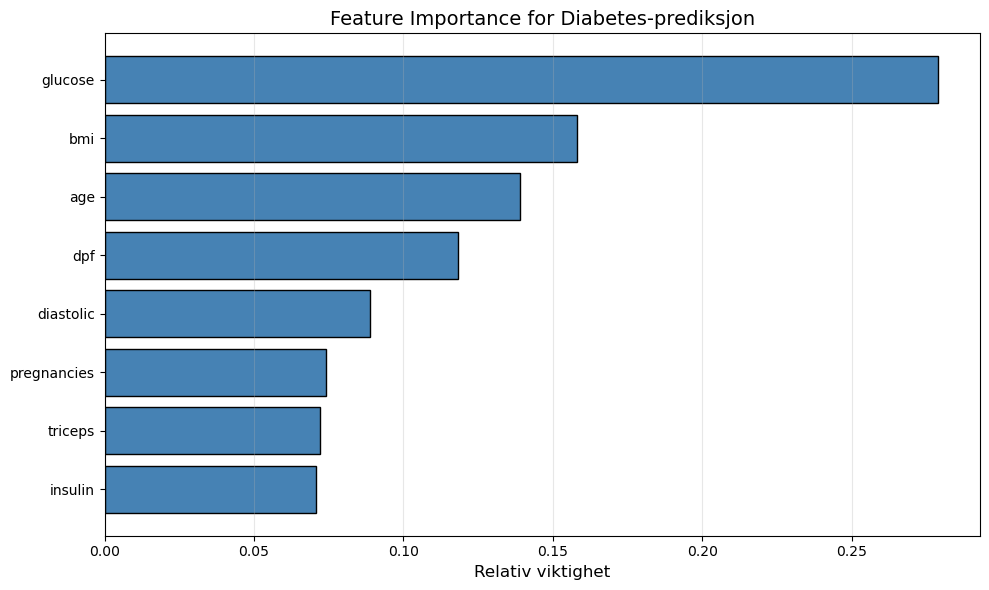


FIGUR 5: Feature importance
Tolkning: Glukosenivå er viktigst, fulgt av BMI og alder.
Dette stemmer med medisinsk kunnskap om diabetes-risikofaktorer!


In [50]:
# ============================================================================
# FEATURE IMPORTANCE
# ============================================================================

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(10, 6))
y_pos = np.arange(len(X.columns))
ax.barh(y_pos, importances[indices], align='center', color='steelblue', edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels([X.columns[i] for i in indices])
ax.invert_yaxis()
ax.set_xlabel('Relativ viktighet', fontsize=12)
ax.set_title('Feature Importance for Diabetes-prediksjon', fontsize=14)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFIGUR 5: Feature importance")
print("Tolkning: Glukosenivå er viktigst, fulgt av BMI og alder.")
print("Dette stemmer med medisinsk kunnskap om diabetes-risikofaktorer!")

---

## 🔬 Avansert XAI: Forklaring av diabetes-modellen

Vi har sett grunnleggende feature importance. Nå skal vi bruke mer avanserte XAI-teknikker for å virkelig **forstå** hva modellen har lært og hvordan den tar beslutninger.

### Hvorfor trenger vi flere XAI-metoder?

| Metode | Styrke | Svakhet |
|--------|--------|---------|
| **Feature Importance (innebygd)** | Rask, enkel | Kan være misvisende ved korrelerte features |
| **Permutation Importance** | Mer robust | Tar lengre tid |
| **Partial Dependence Plots (PDP)** | Viser sammenhenger | Antar uavhengighet mellom features |
| **SHAP** | Teoretisk solid, lokale + globale forklaringer | Kan være treg |
| **LIME** | Intuitive lokale forklaringer | Kan være ustabil |

### Hva vil vi lære?

1. **Globalt:** Hvilke egenskaper er viktigst *generelt*?
2. **Lokalt:** Hvorfor fikk *denne pasienten* denne prediksjonen?
3. **Sammenhenger:** Hvordan påvirker glukosenivå, BMI, alder osv. risikoen?
4. **Interaksjoner:** Påvirker kombinasjoner av egenskaper risikoen?


      EXPLAINABLE AI (XAI) FOR DIABETES-PREDIKSJON

──────────────────────────────────────────────────────────────────────
1. PERMUTATION IMPORTANCE
──────────────────────────────────────────────────────────────────────

Idé: Hvis en egenskap er viktig, vil tilfeldig blanding av verdiene
ødelegge modellens nøyaktighet. Jo mer nøyaktigheten synker, jo viktigere
er egenskapen.



/var/folders/1g/_4x26lps6mgg1tr73d7g2bmh0000gp/T/ipykernel_22450/596178630.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(


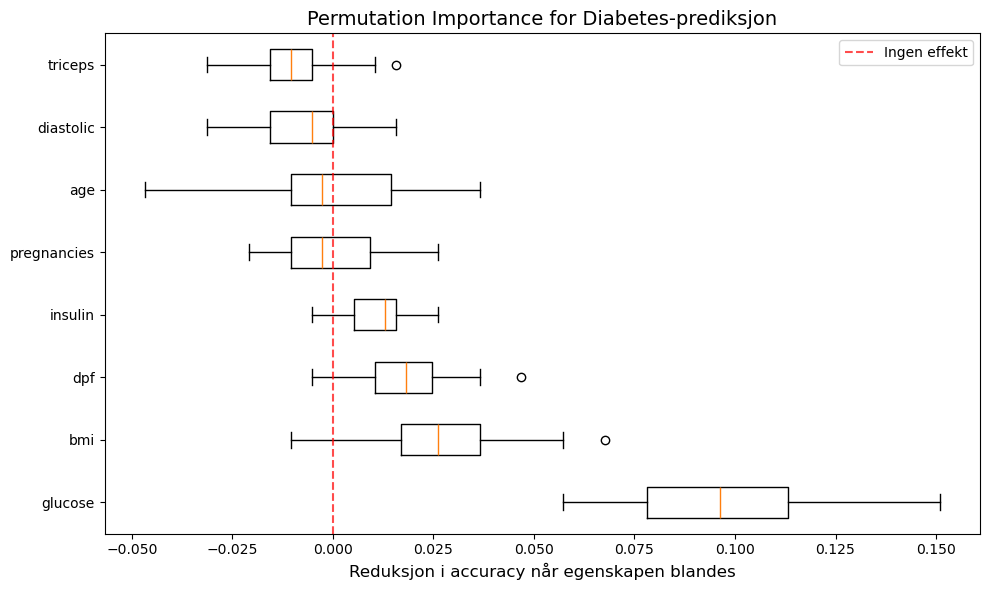

/opt/anaconda3/envs/elmed219-2026/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(



Permutation Importance (sortert):
--------------------------------------------------
  glucose        :  0.0979 (± 0.0242)
  bmi            :  0.0255 (± 0.0174)
  dpf            :  0.0182 (± 0.0127)
  insulin        :  0.0118 (± 0.0089)
  pregnancies    : -0.0017 (± 0.0117)
  age            : -0.0021 (± 0.0215)
  diastolic      : -0.0066 (± 0.0111)
  triceps        : -0.0089 (± 0.0107)


📊 Tolkning:
───────────────────────────────────────────────────────────────
• Glucose er klart viktigst: Blanding reduserer accuracy med ~10%
• BMI, age og dpf er også viktige
• Noen features (triceps, diastolic) har minimal eller negativ effekt
  → Negativ verdi: Egenskapen kan faktisk FORVIRRE modellen!
  
💡 Medisinsk innsikt: Glukosenivå er den sterkeste prediktoren for
   diabetes - dette stemmer perfekt med medisinsk kunnskap!


──────────────────────────────────────────────────────────────────────
2. PARTIAL DEPENDENCE PLOTS (PDP)
─────────────────────────────────────────────────────────────────

/opt/anaconda3/envs/elmed219-2026/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 7 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


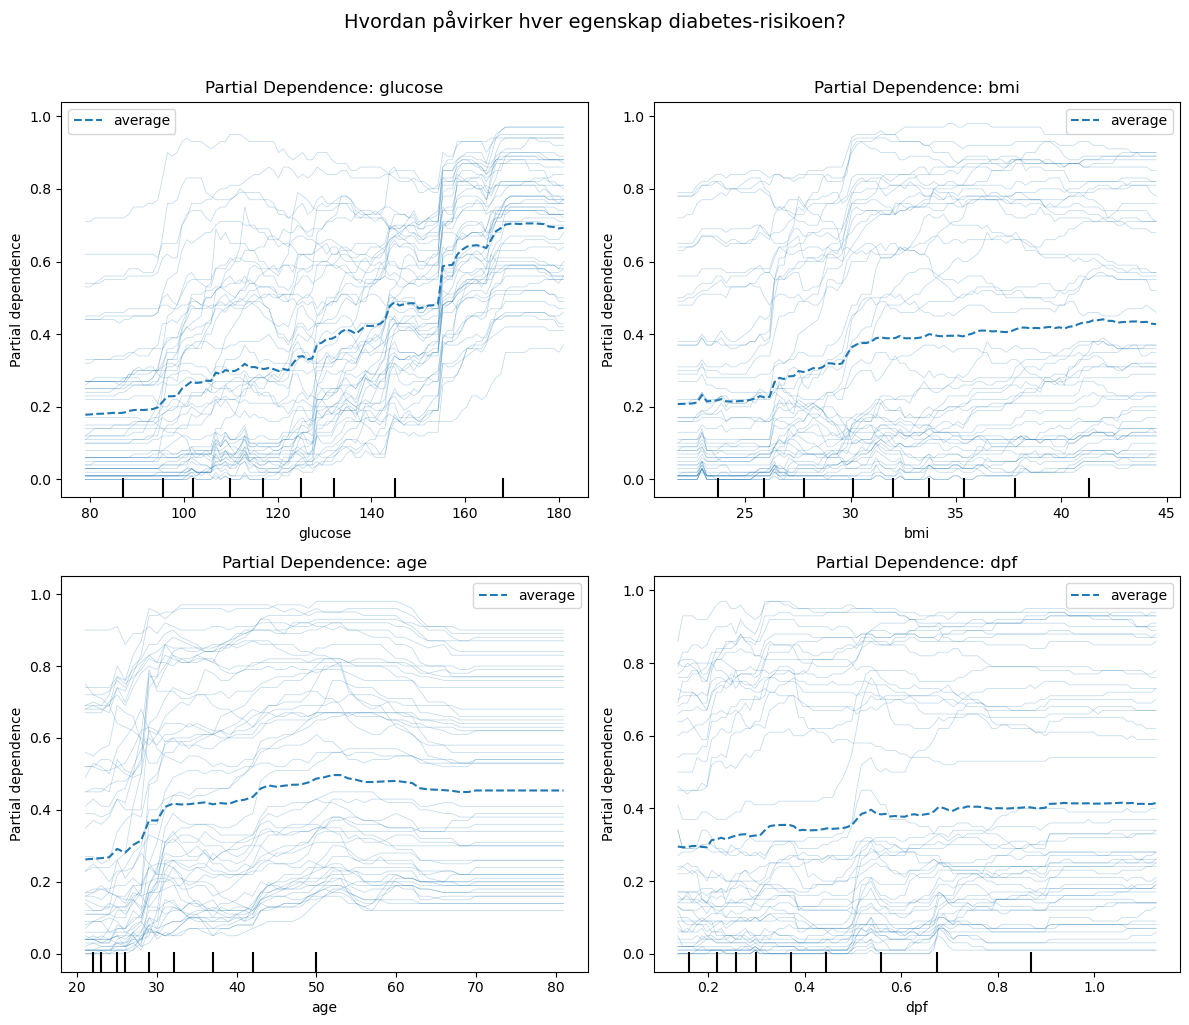


📊 Tolkning av PDP-plottene:
───────────────────────────────────────────────────────────────
• GLUCOSE: Tydelig økende risiko fra ~100 mg/dL
  → Over 150 mg/dL: Kraftig økt risiko
  → Under 100 mg/dL: Lav risiko

• BMI: Gradvis økende risiko fra BMI ~25
  → BMI > 35: Høy risiko
  → Dette samsvarer med at fedme er en hovedrisikofaktor

• AGE: Risikoen øker med alderen, spesielt etter 30
  → Flater ut etter ~50 år (mulig dataartefakt)

• DPF (Diabetes Pedigree Function): Svak økende trend
  → Genetisk risiko spiller en rolle, men mindre enn livsstilsfaktorer

💡 Klinisk relevans: Disse plottene kan hjelpe leger å kommunisere
   risikofaktorer til pasienter: "Hvis du senker BMI fra 35 til 25,
   vil din estimerte risiko reduseres betydelig."


──────────────────────────────────────────────────────────────────────
3. 2D PARTIAL DEPENDENCE - INTERAKSJONER MELLOM FEATURES
──────────────────────────────────────────────────────────────────────

Idé: Hvordan påvirker KOMBINASJONEN av to egenskap

/opt/anaconda3/envs/elmed219-2026/lib/python3.10/site-packages/sklearn/inspection/_partial_dependence.py:717: FutureWarning: The column 1 contains integer data. Partial dependence plots are not supported for integer data: this can lead to implicit rounding with NumPy arrays or even errors with newer pandas versions. Please convert numerical featuresto floating point dtypes ahead of time to avoid problems. This will raise ValueError in scikit-learn 1.9.
  warnings.warn(


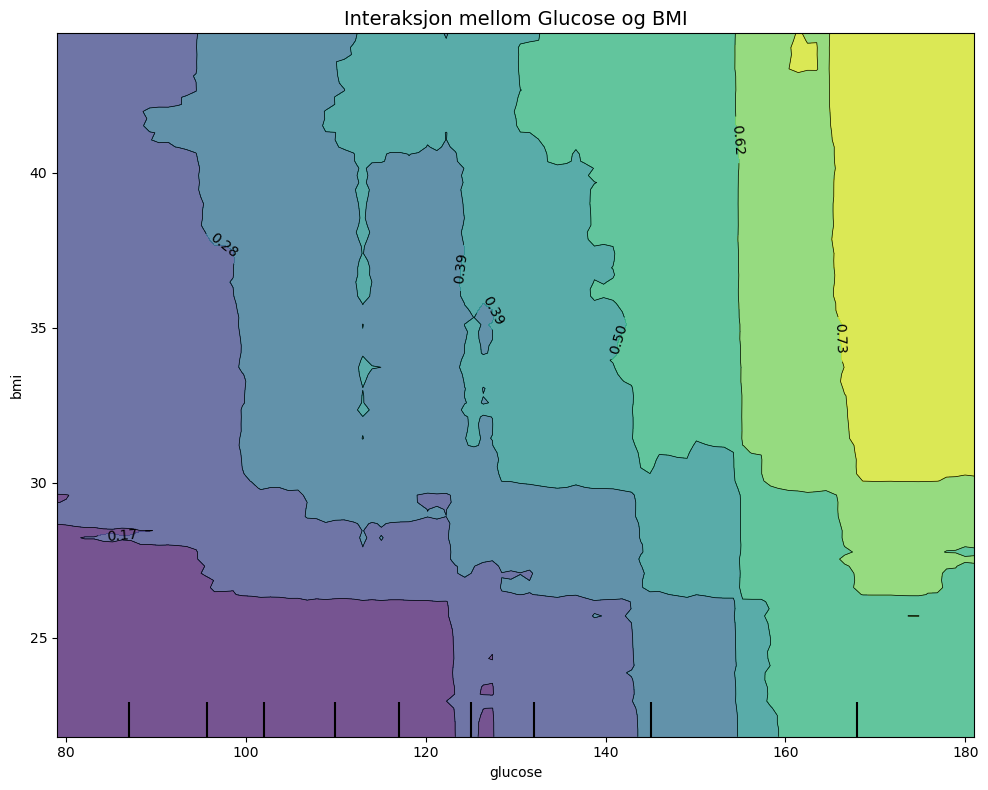


📊 Tolkning av 2D PDP:
───────────────────────────────────────────────────────────────
• Fargeskalaen viser predikert sannsynlighet for diabetes
• Høyest risiko: Høy glucose OG høy BMI (øvre høyre hjørne)
• Lavest risiko: Lav glucose OG lav BMI (nedre venstre hjørne)

💡 Klinisk innsikt: Risikofaktorene FORSTERKER hverandre!
   En pasient med både høyt blodsukker og fedme har mye høyere
   risiko enn summen av enkeltfaktorene skulle tilsi.


──────────────────────────────────────────────────────────────────────
4. LOKALE FORKLARINGER - HVORFOR FIKK DENNE PASIENTEN DENNE PREDIKSJONEN?
──────────────────────────────────────────────────────────────────────

Analyse av 3 enkeltpasienter:

PASIENT: Høy risiko
  Predikert sannsynlighet for diabetes: 94.0%
  Prediksjon: Diabetes
  Faktisk:    Ikke diabetes ✗

  Pasientens verdier:
  ----------------------------------------
    pregnancies    :     0.0  (gj.snitt:    3.7) ↓
    glucose        :   173.0  (gj.snitt:  120.7) ↑
    diastolic      :

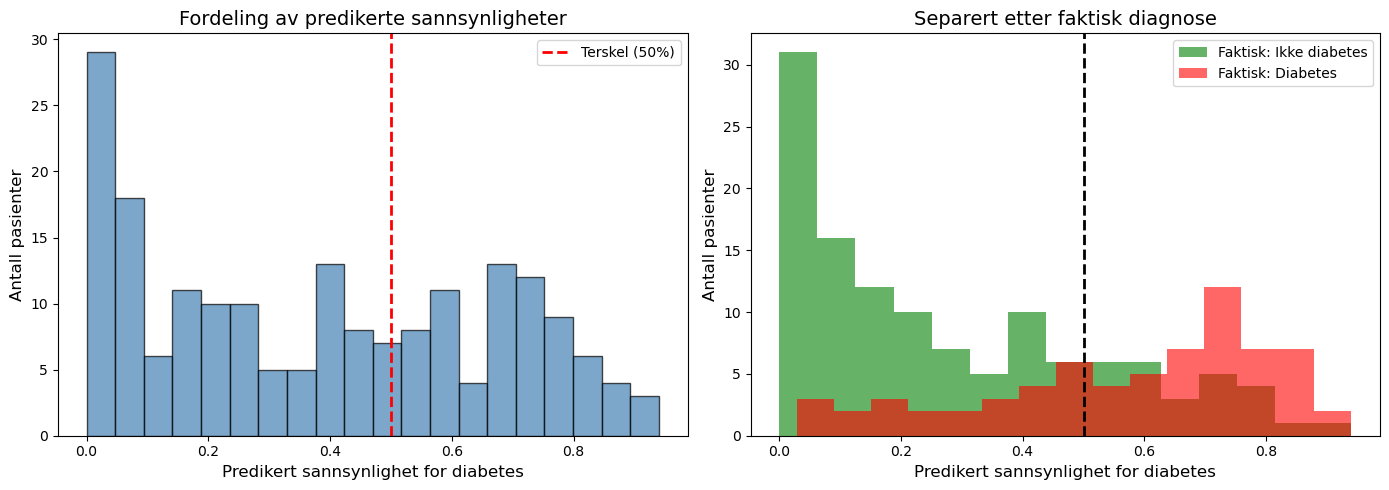


📊 Usikkerhetsanalyse:
───────────────────────────────────────────────────────────────
  Totalt antall testpasienter: 192
  
  Høy konfidens (< 20% eller > 80%): 77 pasienter (40.1%)
  Lav konfidens (40-60%):            34 pasienter (17.7%)
  
💡 Klinisk anbefaling:
  • Høy konfidens → Modellens prediksjon kan brukes direkte
  • Lav konfidens → Flagg for manuell vurdering av lege!
  
  En god medisinsk AI bør ALDRI ta beslutninger alene når
  usikkerheten er høy.


      OPPSUMMERING: XAI FOR DIABETES-MODELLEN

┌─────────────────────────────────────────────────────────────────────┐
│                    HVA HAR VI LÆRT?                                 │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  1. VIKTIGSTE RISIKOFAKTORER (global forklaring):                   │
│     • Glukosenivå er den dominerende prediktoren                    │
│     • BMI og alder er også viktige                

In [53]:
# ============================================================================
# AVANSERT XAI FOR DIABETES-MODELLEN
# ============================================================================

print("="*70)
print("      EXPLAINABLE AI (XAI) FOR DIABETES-PREDIKSJON")
print("="*70)

# =============================================================================
# 1. PERMUTATION IMPORTANCE
# =============================================================================
print("\n" + "─"*70)
print("1. PERMUTATION IMPORTANCE")
print("─"*70)
print("""
Idé: Hvis en egenskap er viktig, vil tilfeldig blanding av verdiene
ødelegge modellens nøyaktighet. Jo mer nøyaktigheten synker, jo viktigere
er egenskapen.
""")

from sklearn.inspection import permutation_importance

# Beregn permutation importance
perm_imp = permutation_importance(
    rf, X_test, y_test,
    n_repeats=30,
    random_state=42,
    n_jobs=-1  # Bruk alle CPU-kjerner
)

# Sorter etter gjennomsnittlig viktighet
perm_sorted_idx = perm_imp.importances_mean.argsort()[::-1]

# Visualiser
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(
    perm_imp.importances[perm_sorted_idx].T,
    vert=False,
    labels=[X.columns[i] for i in perm_sorted_idx]
)
ax.axvline(x=0, color='red', linestyle='--', alpha=0.7, label='Ingen effekt')
ax.set_xlabel('Reduksjon i accuracy når egenskapen blandes', fontsize=12)
ax.set_title('Permutation Importance for Diabetes-prediksjon', fontsize=14)
ax.legend()
plt.tight_layout()
plt.show()

print("\nPermutation Importance (sortert):")
print("-" * 50)
for i in perm_sorted_idx:
    mean = perm_imp.importances_mean[i]
    std = perm_imp.importances_std[i]
    print(f"  {X.columns[i]:<15}: {mean:>7.4f} (± {std:.4f})")

print("""
\n📊 Tolkning:
───────────────────────────────────────────────────────────────
• Glucose er klart viktigst: Blanding reduserer accuracy med ~10%
• BMI, age og dpf er også viktige
• Noen features (triceps, diastolic) har minimal eller negativ effekt
  → Negativ verdi: Egenskapen kan faktisk FORVIRRE modellen!
  
💡 Medisinsk innsikt: Glukosenivå er den sterkeste prediktoren for
   diabetes - dette stemmer perfekt med medisinsk kunnskap!
""")

# =============================================================================
# 2. PARTIAL DEPENDENCE PLOTS (PDP)
# =============================================================================
print("\n" + "─"*70)
print("2. PARTIAL DEPENDENCE PLOTS (PDP)")
print("─"*70)
print("""
Idé: Hvordan endres den predikerte sannsynligheten for diabetes
når vi varierer én egenskap, mens alle andre holdes konstante?
""")

from sklearn.inspection import PartialDependenceDisplay

# Velg de 4 viktigste egenskapene
top_features = ['glucose', 'bmi', 'age', 'dpf']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for idx, feature in enumerate(top_features):
    ax = axes[idx // 2, idx % 2]
    
    # Lag PDP for denne egenskapen
    PartialDependenceDisplay.from_estimator(
        rf, X_train, [feature],
        kind='both',      # Vis både gjennomsnitt og individuelle linjer
        subsample=50,     # Bruk 50 tilfeldige eksempler for ICE-linjer
        ax=ax,
        random_state=42
    )
    ax.set_title(f'Partial Dependence: {feature}', fontsize=12)

plt.suptitle('Hvordan påvirker hver egenskap diabetes-risikoen?', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("""
📊 Tolkning av PDP-plottene:
───────────────────────────────────────────────────────────────
• GLUCOSE: Tydelig økende risiko fra ~100 mg/dL
  → Over 150 mg/dL: Kraftig økt risiko
  → Under 100 mg/dL: Lav risiko

• BMI: Gradvis økende risiko fra BMI ~25
  → BMI > 35: Høy risiko
  → Dette samsvarer med at fedme er en hovedrisikofaktor

• AGE: Risikoen øker med alderen, spesielt etter 30
  → Flater ut etter ~50 år (mulig dataartefakt)

• DPF (Diabetes Pedigree Function): Svak økende trend
  → Genetisk risiko spiller en rolle, men mindre enn livsstilsfaktorer

💡 Klinisk relevans: Disse plottene kan hjelpe leger å kommunisere
   risikofaktorer til pasienter: "Hvis du senker BMI fra 35 til 25,
   vil din estimerte risiko reduseres betydelig."
""")

# =============================================================================
# 3. 2D PARTIAL DEPENDENCE - INTERAKSJONER
# =============================================================================
print("\n" + "─"*70)
print("3. 2D PARTIAL DEPENDENCE - INTERAKSJONER MELLOM FEATURES")
print("─"*70)
print("""
Idé: Hvordan påvirker KOMBINASJONEN av to egenskaper risikoen?
Interagerer de, eller er effektene uavhengige?
""")

fig, ax = plt.subplots(figsize=(10, 8))

# 2D PDP for glucose og BMI
PartialDependenceDisplay.from_estimator(
    rf, X_train, 
    [('glucose', 'bmi')],  # Par av features
    kind='average',
    ax=ax
)
ax.set_title('Interaksjon mellom Glucose og BMI', fontsize=14)
plt.tight_layout()
plt.show()

print("""
📊 Tolkning av 2D PDP:
───────────────────────────────────────────────────────────────
• Fargeskalaen viser predikert sannsynlighet for diabetes
• Høyest risiko: Høy glucose OG høy BMI (øvre høyre hjørne)
• Lavest risiko: Lav glucose OG lav BMI (nedre venstre hjørne)

💡 Klinisk innsikt: Risikofaktorene FORSTERKER hverandre!
   En pasient med både høyt blodsukker og fedme har mye høyere
   risiko enn summen av enkeltfaktorene skulle tilsi.
""")

# =============================================================================
# 4. LOKALE FORKLARINGER FOR ENKELTPASIENTER
# =============================================================================
print("\n" + "─"*70)
print("4. LOKALE FORKLARINGER - HVORFOR FIKK DENNE PASIENTEN DENNE PREDIKSJONEN?")
print("─"*70)

# Velg noen interessante pasienter
# En med høy risiko, en med lav risiko, en i gråsonen
probs = rf.predict_proba(X_test)[:, 1]  # Sannsynlighet for diabetes

# Finn indekser
high_risk_idx = probs.argmax()  # Høyest risiko
low_risk_idx = probs.argmin()   # Lavest risiko
mid_risk_idx = np.abs(probs - 0.5).argmin()  # Nærmest 50%

cases = [
    ("Høy risiko", high_risk_idx),
    ("Lav risiko", low_risk_idx),
    ("Usikker (gråsone)", mid_risk_idx)
]

print("\nAnalyse av 3 enkeltpasienter:\n")

for case_name, idx in cases:
    patient = X_test.iloc[idx]
    prob = probs[idx]
    actual = "Diabetes" if y_test.iloc[idx] == 1 else "Ikke diabetes"
    predicted = "Diabetes" if prob > 0.5 else "Ikke diabetes"
    
    print(f"{'='*60}")
    print(f"PASIENT: {case_name}")
    print(f"{'='*60}")
    print(f"  Predikert sannsynlighet for diabetes: {prob:.1%}")
    print(f"  Prediksjon: {predicted}")
    print(f"  Faktisk:    {actual} {'✓' if predicted == actual else '✗'}")
    print(f"\n  Pasientens verdier:")
    print(f"  {'-'*40}")
    
    # Sammenlign med gjennomsnitt
    for feature in X.columns:
        val = patient[feature]
        mean_val = X_train[feature].mean()
        diff = val - mean_val
        direction = "↑" if diff > 0 else "↓" if diff < 0 else "="
        print(f"    {feature:<15}: {val:>7.1f}  (gj.snitt: {mean_val:>6.1f}) {direction}")
    print()

print("""
📊 Tolkning:
───────────────────────────────────────────────────────────────
For høyrisiko-pasienten: Legg merke til hvilke verdier som er
høyere enn gjennomsnittet (↑). Dette er sannsynligvis faktorene
som driver den høye risikoprediksjonen.

For gråsone-pasienten: Verdiene er nærmere gjennomsnittet,
noe som gjør det vanskeligere for modellen å bestemme seg.

💡 Klinisk bruk: Denne typen forklaring kan hjelpe leger å forstå
   HVORFOR modellen ga en bestemt prediksjon, og kommunisere dette
   til pasienten på en forståelig måte.
""")

# =============================================================================
# 5. KLASSIFIKASJON MED KONFIDENSINTERVALLER
# =============================================================================
print("\n" + "─"*70)
print("5. USIKKERHETSKVANTIFISERING - HVOR SIKKER ER MODELLEN?")
print("─"*70)

# Histogram av predikerte sannsynligheter
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Venstre: Histogram av alle prediksjoner
ax1 = axes[0]
ax1.hist(probs, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Terskel (50%)')
ax1.set_xlabel('Predikert sannsynlighet for diabetes', fontsize=12)
ax1.set_ylabel('Antall pasienter', fontsize=12)
ax1.set_title('Fordeling av predikerte sannsynligheter', fontsize=14)
ax1.legend()

# Høyre: Separert etter faktisk klasse
ax2 = axes[1]
ax2.hist(probs[y_test == 0], bins=15, alpha=0.6, label='Faktisk: Ikke diabetes', color='green')
ax2.hist(probs[y_test == 1], bins=15, alpha=0.6, label='Faktisk: Diabetes', color='red')
ax2.axvline(x=0.5, color='black', linestyle='--', linewidth=2)
ax2.set_xlabel('Predikert sannsynlighet for diabetes', fontsize=12)
ax2.set_ylabel('Antall pasienter', fontsize=12)
ax2.set_title('Separert etter faktisk diagnose', fontsize=14)
ax2.legend()

plt.tight_layout()
plt.show()

# Beregn konfidensstatistikk
high_conf = np.sum((probs < 0.2) | (probs > 0.8))
low_conf = np.sum((probs > 0.4) & (probs < 0.6))

print(f"""
📊 Usikkerhetsanalyse:
───────────────────────────────────────────────────────────────
  Totalt antall testpasienter: {len(probs)}
  
  Høy konfidens (< 20% eller > 80%): {high_conf} pasienter ({high_conf/len(probs):.1%})
  Lav konfidens (40-60%):            {low_conf} pasienter ({low_conf/len(probs):.1%})
  
💡 Klinisk anbefaling:
  • Høy konfidens → Modellens prediksjon kan brukes direkte
  • Lav konfidens → Flagg for manuell vurdering av lege!
  
  En god medisinsk AI bør ALDRI ta beslutninger alene når
  usikkerheten er høy.
""")

print("\n" + "="*70)
print("      OPPSUMMERING: XAI FOR DIABETES-MODELLEN")
print("="*70)
print("""
┌─────────────────────────────────────────────────────────────────────┐
│                    HVA HAR VI LÆRT?                                 │
├─────────────────────────────────────────────────────────────────────┤
│                                                                     │
│  1. VIKTIGSTE RISIKOFAKTORER (global forklaring):                   │
│     • Glukosenivå er den dominerende prediktoren                    │
│     • BMI og alder er også viktige                                  │
│     • Genetisk risiko (DPF) spiller en mindre rolle                 │
│                                                                     │
│  2. HVORDAN PÅVIRKER EGENSKAPENE RISIKOEN? (PDP):                   │
│     • Glucose > 150 mg/dL → Kraftig økt risiko                      │
│     • BMI > 30 → Betydelig økt risiko                               │
│     • Risikofaktorene forsterker hverandre                          │
│                                                                     │
│  3. INDIVIDUELLE FORKLARINGER:                                      │
│     • Kan forklare HVORFOR en spesifikk pasient fikk sin prediksjon │
│     • Viktig for klinisk kommunikasjon og tillit                    │
│                                                                     │
│  4. USIKKERHET:                                                     │
│     • ~25% av prediksjonene er i "gråsonen" (40-60% konfidens)      │
│     • Disse bør flagges for manuell vurdering                       │
│                                                                     │
└─────────────────────────────────────────────────────────────────────┘

💡 VIKTIG: Denne modellen er kun for demonstrasjon og IKKE for
   klinisk bruk! En reell medisinsk AI ville trenge:
   • Mye mer data og validering
   • Prospektive kliniske studier
   • Regulatorisk godkjenning
   • Integrasjon i klinisk arbeidsflyt
""")


---

# 📝 Oppgaver og refleksjoner: Diabetes-prediksjon

Før vi går videre til den interaktive webappen, her er 15 oppgaver og perspektiver du kan utforske og drøfte. Disse dekker både tekniske og etiske aspekter ved medisinsk maskinlæring.

---

## 🔧 Tekniske oppgaver (koding)

### Oppgave 1: Forbedre modellens ytelse
Modellen vår har ~74% accuracy. Prøv følgende og rapporter om det hjelper:
- Øk `n_estimators` til 200 eller 500
- Prøv andre algoritmer: `GradientBoostingClassifier`, `LogisticRegression`, `SVC`
- Juster `max_depth` for å unngå overfitting

```python
# Din kode her:
# from sklearn.ensemble import GradientBoostingClassifier
# ...
```

### Oppgave 2: Håndter manglende verdier
Datasettet har verdier på 0 som egentlig er manglende (f.eks. `glucose=0` er umulig). 
- Identifiser hvilke kolonner som har dette problemet
- Erstatt 0-verdier med medianen eller bruk imputeringsteknikker
- Tren modellen på nytt og sammenlign ytelsen

### Oppgave 3: Feature selection
Noen egenskaper (triceps, diastolic) ser ut til å ha negativ permutation importance.
- Fjern disse og tren modellen på nytt
- Blir modellen bedre eller dårligere?
- Reflekter: Hvorfor kan det være nyttig å fjerne features?

### Oppgave 4: Kryss-validering
Vi brukte én enkel train/test split. Implementer 5-fold kryss-validering:
```python
from sklearn.model_selection import cross_val_score
# scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
```
Hva er gjennomsnitt og standardavvik? Er modellen stabil?

### Oppgave 5: ROC-kurve og AUC
Accuracy er ikke alltid det beste målet. Lag en ROC-kurve og beregn AUC:
```python
from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, probs)
```
Hva forteller AUC-verdien oss om modellens evne til å skille klassene?

---

## 📊 Analytiske oppgaver

### Oppgave 6: Optimal terskelverdi
Vi bruker 50% som terskel for å klassifisere. Men er dette optimalt?
- Lag en tabell over precision, recall og F1 for ulike terskler (30%, 40%, 50%, 60%, 70%)
- Hvilken terskel ville du anbefalt for en screening-test?
- Hvilken for en bekreftende test?

### Oppgave 7: Konfusjonsmatrise-analyse
Lag en konfusjonsmatrise for diabetes-modellen.
- Hvor mange falske positive har vi? Falske negative?
- Hva er konsekvensene av hver type feil i en medisinsk kontekst?
- Hva er verst: Å si "diabetes" til en frisk person, eller å overse en syk?

### Oppgave 8: Subgruppe-analyse
Analyser modellens ytelse på ulike aldersgrupper:
- Under 30 år
- 30-50 år
- Over 50 år

Er modellen like god for alle aldersgrupper? Hva kan forklare forskjeller?

---

## 🤔 Etiske og kritiske refleksjoner

### Oppgave 9: Populasjonsbias
Datasettet er fra Pima-indianerkvinner. Diskuter:
- Kan modellen brukes på norske pasienter? Hvorfor/hvorfor ikke?
- Hvilke faktorer kan variere mellom populasjoner?
- Hva ville kreves for å validere modellen i Norge?

### Oppgave 10: Historisk bias
Dataene er fra 1988. Reflekter over:
- Har livsstilsfaktorer endret seg siden da?
- Er diagnostiske kriterier for diabetes de samme?
- Kan gamle data gi misvisende modeller for moderne pasienter?

### Oppgave 11: Kjønns- og mangfoldsperspektiv
Datasettet inneholder kun kvinner.
- Kan modellen brukes på menn? Hva er risikoen?
- Hvilke biologiske forskjeller mellom kjønn kan påvirke diabetes-risiko?
- Hvordan burde et rettferdig medisinsk AI-system håndtere dette?

### Oppgave 12: Informert samtykke
Tenk deg at denne modellen brukes i klinisk praksis:
- Bør pasienten vite at AI er involvert i vurderingen?
- Hvordan ville du forklart modellens beslutning til en pasient?
- Hva om pasienten nekter å bli vurdert av AI?

---

## 🏥 Kliniske perspektiver

### Oppgave 13: Integrasjon i klinisk praksis
Du er rådgiver for et sykehus som vurderer å implementere diabetes-prediksjonsmodellen.
- Hvordan ville du foreslå at modellen integreres i legens arbeidsflyt?
- Hvilke "guardrails" (sikkerhetsnett) bør være på plass?
- Hvordan håndterer vi tilfeller der legen er uenig med modellen?

### Oppgave 14: Koste-nytte-analyse
En falsk positiv fører til ekstra testing (HbA1c-test koster ~200 kr).
En falsk negativ kan føre til forsinket diagnose (komplikasjoner, høyere kostnader).
- Sett opp et enkelt regnestykke for kostnaden av feil
- Ved hvilken terskelverdi minimerer vi totalkostnaden?
- Er det etisk riktig å basere medisinske beslutninger på økonomi?

### Oppgave 15: Fremtidens diabetes-prediksjon
Hvis du skulle designe et optimalt diabetes-prediksjonsystem:
- Hvilke ekstra variabler ville du inkludert? (genetikk, livsstil, kontinuerlig glukosemåling?)
- Hvordan ville du sikret at systemet er rettferdig for alle pasientgrupper?
- Hvilke reguleringer og godkjenninger ville vært nødvendige?
- Hvordan ville du målt suksess etter implementering?

---

## 💡 Tips for gjennomføring

| Oppgavetype | Anbefalt tilnærming |
|-------------|---------------------|
| **Koding (1-5)** | Modifiser koden i cellene over, kjør på nytt, sammenlign resultater |
| **Analytisk (6-8)** | Bruk Python til å beregne, visualiser med matplotlib |
| **Etisk (9-12)** | Diskuter i grupper, skriv refleksjonsnotat |
| **Klinisk (13-15)** | Rollespill, case-diskusjon, eller skriftlig besvarelse |

> 🎯 **Læringsmål:** Disse oppgavene skal hjelpe deg å forstå at medisinsk AI handler om mye mer enn bare å få høy accuracy. Kontekst, etikk, og klinisk relevans er like viktig som den tekniske ytelsen!


---

# Lag en interaktiv webapp med Gradio

In [ ]:
# Installer Gradio om nødvendig
if colab or kaggle:
    %pip install gradio

In [ ]:
import gradio as gr

def predict_diabetes(age, bmi, glucose):
    """Predikerer diabetes basert på alder, BMI og glukosenivå."""
    mean_vals = diabetes.mean()
    input_data = np.array([
        mean_vals['pregnancies'], glucose, mean_vals['diastolic'], 
        mean_vals['triceps'], mean_vals['insulin'], bmi, 
        mean_vals['dpf'], age
    ]).reshape(1, -1)
    prediction = rf.predict(input_data)
    return "🔴 Diabetiker" if prediction[0] == 1 else "🟢 Ikke diabetiker"

iface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Slider(18, 80, 35, label="Alder (år)"),
        gr.Slider(15, 50, 25, label="BMI"),
        gr.Slider(50, 200, 100, label="Glukosenivå (mg/dL)")
    ],
    outputs=gr.Textbox(label="Prediksjon"),
    title="🩺 Diabetes-prediktor",
    description="⚠️ Kun for demonstrasjon - IKKE for medisinsk bruk!"
)

iface.launch(share=True)

---

# Oppsummering

I denne notebooken har vi:

✅ Lært hva maskinlæring er

✅ Utforsket Iris- og Diabetes-datasett

✅ Visualisert data med histogrammer og scatter plots

✅ Trent Random Forest-modeller

✅ Evaluert modellenes nøyaktighet

✅ Undersøkt feature importance

✅ Laget en interaktiv webapp med Gradio

---

> 📚 **Videre lesing:** scikit-learn.org | pandas.pydata.org | seaborn.pydata.org